In [1]:
#import 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA

C:\Users\91896\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv("C:\\Users\\91896\\Downloads\\Gold_data.csv",parse_dates=True, index_col="date")
data.shape

(2182, 1)

In [4]:
#Exploratory Data Analysis
data.head()

,price
date,
2016-01-01,2252.60
2016-01-02,2454.50
2016-01-03,2708.10
2016-01-04,2577.80
2016-01-05,2597.75


In [5]:
data.tail()

,price
date,
2021-12-17,4394.4
2021-12-18,4389.5
2021-12-19,4389.5
2021-12-20,4354.1
2021-12-21,4346.5


In [6]:
list(data)

['price']

In [7]:
type(data)

pandas.core.frame.DataFrame

In [8]:
data.ndim

2

In [9]:
data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2182 entries, 2016-01-01 to 2021-12-21
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   2182 non-null   float64
dtypes: float64(1)
memory usage: 34.1 KB


In [10]:
data.index

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10',
               ...
               '2021-12-12', '2021-12-13', '2021-12-14', '2021-12-15',
               '2021-12-16', '2021-12-17', '2021-12-18', '2021-12-19',
               '2021-12-20', '2021-12-21'],
              dtype='datetime64[ns]', name='date', length=2182, freq=None)

In [34]:
#describe for all mean mode information
data.describe()

,price
count,2182.000000
mean,3284.450046
std,719.564434
min,2252.600000
25%,2697.020000
50%,2879.800000
75%,4147.325000
max,4966.300000


In [10]:
#finding null value
data.isnull()
data.isnull().sum()

date     0
price    0
dtype: int64

In [11]:
#finding duplicates
data[data.duplicated()]

,date,price


In [35]:
data.skew()

price    0.637312
dtype: float64

C:\Users\91896\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


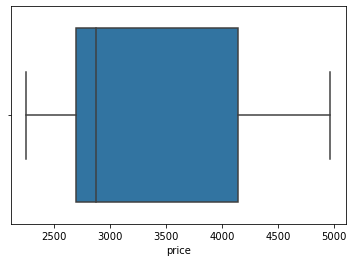

In [45]:
#Outlier Check
outliar = sns.boxplot(data['price'])

In [21]:
#corelation
data.corr()

,price
price,1.0


<AxesSubplot:xlabel='price', ylabel='Density'>

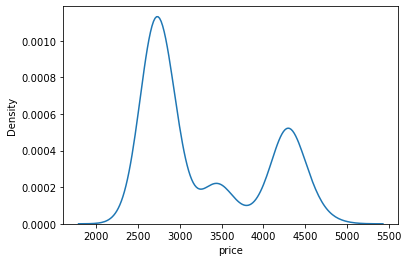

In [80]:
sns.kdeplot(data['price'])

<AxesSubplot:xlabel='date'>

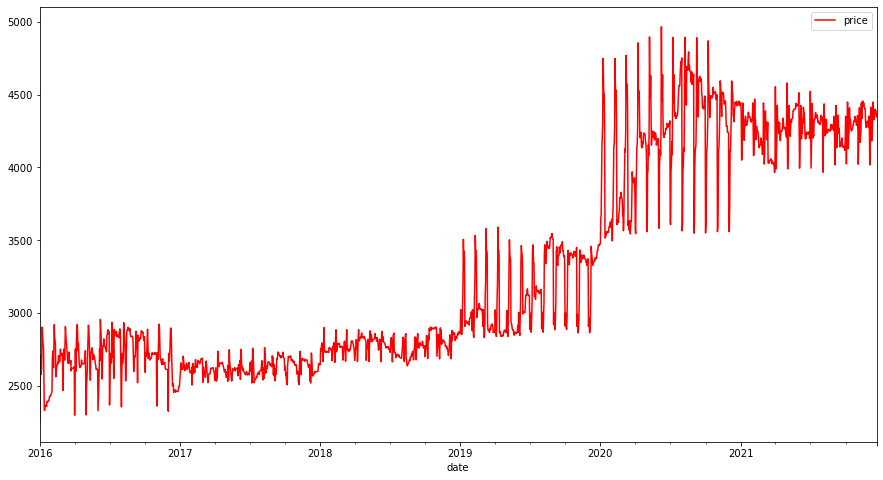

In [52]:
data.plot(figsize = (15,8),color = 'red')

<AxesSubplot:xlabel='date'>

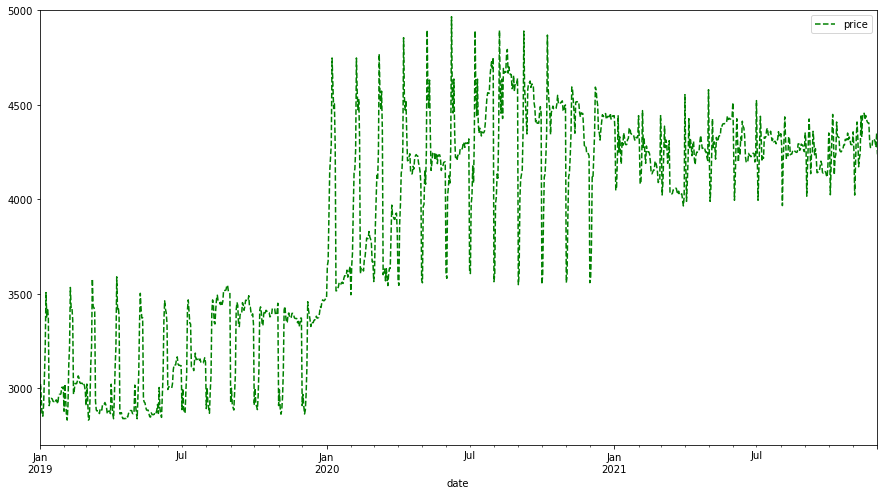

In [3]:
data.plot(xlim = ['2019-01-01','2021-12-01'],ylim = [2700,5000],figsize = (15,8),ls='--',c='green')

                  price
date                   
2016-12-31  2690.614162
2017-12-31  2626.676484
2018-12-31  2781.938082
2019-12-31  3150.210685
2020-12-31  4216.378689
2021-12-31  4266.871549
             price
date              
2016-12-31  2956.6
2017-12-31  2763.4
2018-12-31  2906.0
2019-12-31  3590.4
2020-12-31  4966.3
2021-12-31  4580.3
             price
date              
2016-12-31  2252.6
2017-12-31  2506.5
2018-12-31  2637.9
2019-12-31  2832.7
2020-12-31  3477.6
2021-12-31  3965.3


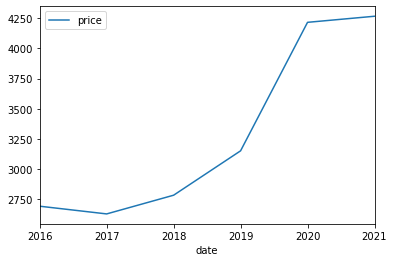

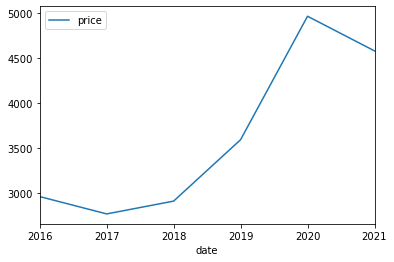

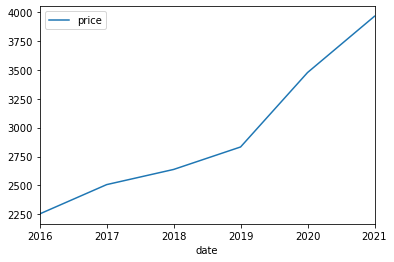

In [88]:
data.resample(rule='A').mean().plot()
data.resample(rule='A').max().plot()
data.resample(rule ='A').min().plot()
print(data.resample(rule='A').mean())
print(data.resample(rule='A').max())
print(data.resample(rule ='A').min())
#checking the mean max and minimam price in yearwise


1so here we can see in the price mean is not much deviated from past year price we can see the deviation only is 1K for 3 year but from 2019 the price went to its all time high at 2020 2.and the min and max value show us that the maximam yaer has gold price treded 7K from its all time low 3 the graph show us that the people who have perchesed gold at the all time hight those only need to worry but the people who have buys on its avg price or min price they still in profit

In [53]:
data_temp = data.copy()
data_temp['Year'] = pd.DatetimeIndex(data_temp.index).year
data_temp['quarter'] = pd.DatetimeIndex(data_temp.index).quarter
data_temp['Month'] = pd.DatetimeIndex(data_temp.index).month
data_temp['Weeks'] = pd.DatetimeIndex(data_temp.index).week

C:\Users\91896\AppData\Local\Temp/ipykernel_4744/3984424621.py:5: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  data_temp['Weeks'] = pd.DatetimeIndex(data_temp.index).week


<AxesSubplot:title={'center':'Seasonality of the Time Series by over the year'}, xlabel='Year', ylabel='price'>

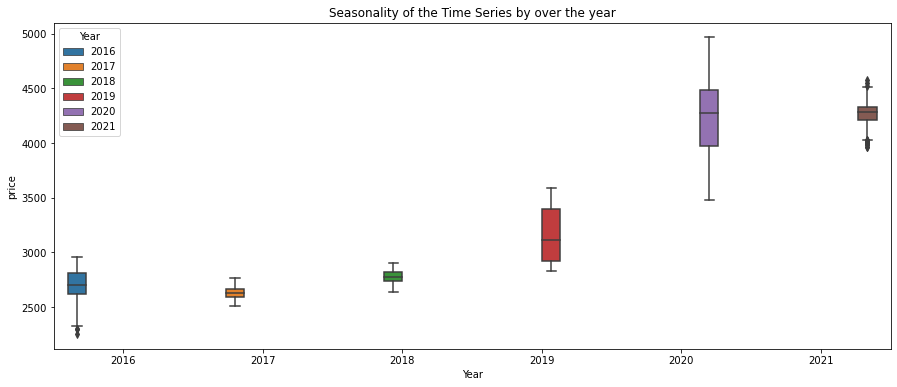

In [25]:
plt.figure(figsize=(15,6))
plt.title('Seasonality of the Time Series by over the year')
sns.boxplot(x='Year',y='price',hue='Year',data=data_temp)

in the year of 2020 we got all time high price and 2016 and 2021 we have some outlier

<AxesSubplot:title={'center':'Seasonality of the Time Series quarter wise'}, xlabel='Year', ylabel='quarter'>

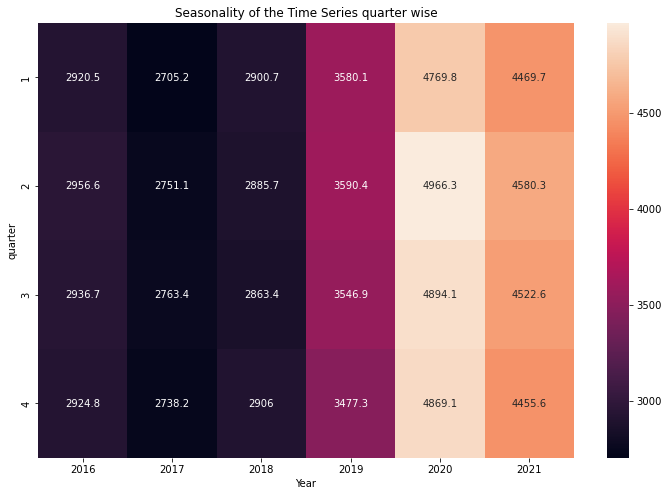

In [55]:
plt.figure(figsize=(12,8))
plt.title('Seasonality of the Time Series quarter wise')
heatmap=pd.pivot_table(data=data_temp,values='price',index=data_temp['quarter'],columns='Year',aggfunc='max',fill_value=0)
sns.heatmap(heatmap,annot = True ,fmt='g')

so here we got in the year of 2020 quarter 2 we got all time high and quarter 2 3 and 4 we can see in the every year of quarter the price in pickup

<AxesSubplot:title={'center':'Seasonality of the Time Series month wise'}, xlabel='Month', ylabel='price'>

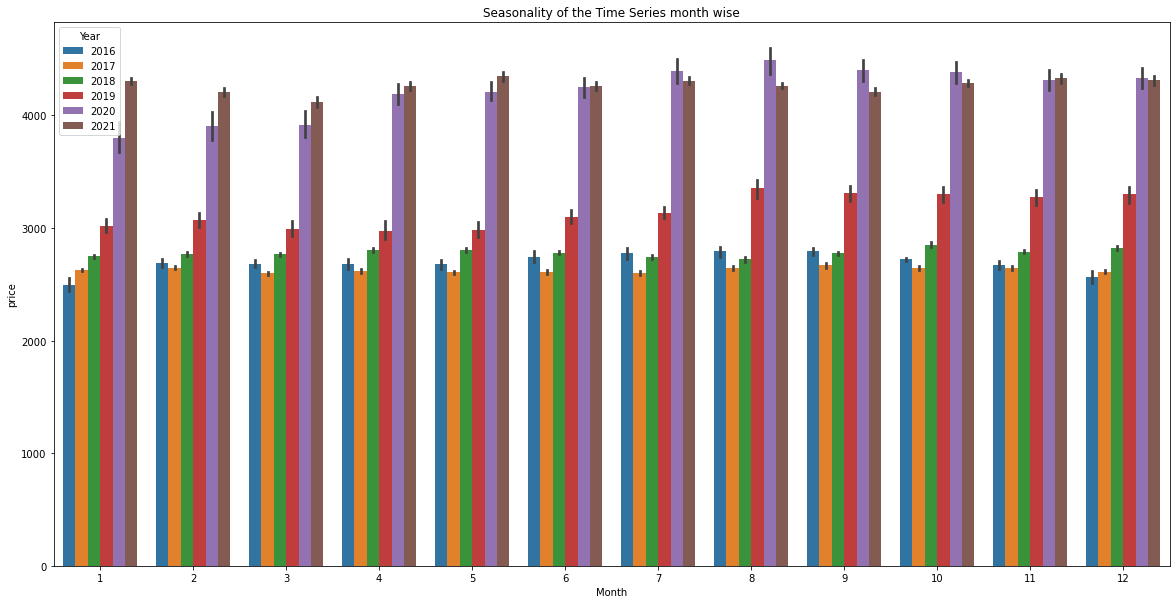

In [59]:
plt.figure(figsize=(20,10))
plt.title('Seasonality of the Time Series month wise')
sns.barplot(x='Month',y='price',hue='Year',data=data_temp)

here we got in the every month of aug the price went high and in jan the price is all time low

<AxesSubplot:title={'center':'Seasonality of the Time Series week wise'}, xlabel='Weeks', ylabel='price'>

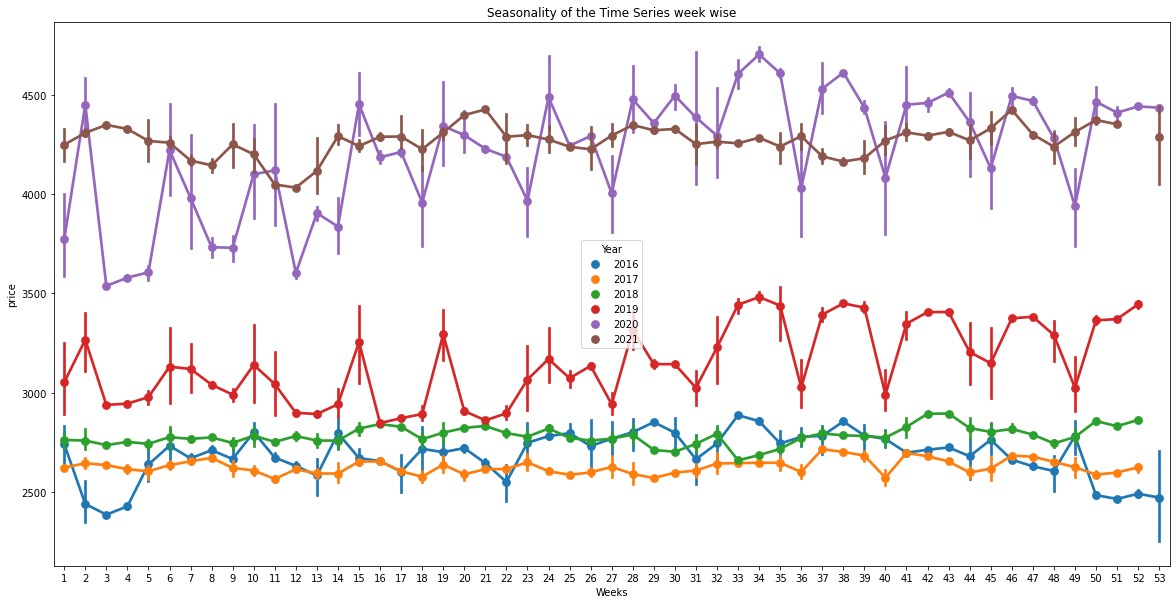

In [62]:
plt.figure(figsize=(20,10))
plt.title('Seasonality of the Time Series week wise')
sns.pointplot(x='Weeks',y='price',hue='Year',data=data_temp)

so here we observe 3 major things 1 we can see the week wise fluctuation is very high compare to month and quarterly wise 
2 here we see for the most of year the week of 34 the price went hight for so week 34 is very importnat for year
3 we can see in the year of 2016 2017 2018 2019 the price is in between 2500 to 3500 but in last two year the price went high more then 10K just in one year so there is something external fector like (covid)

## checking the seasnoality

date
2016-01-01            NaN
2016-01-02            NaN
2016-01-03            NaN
2016-01-04    2587.464286
2016-01-05    2678.207143
                 ...     
2021-12-17    4372.028571
2021-12-18    4374.642857
2021-12-19            NaN
2021-12-20            NaN
2021-12-21            NaN
Name: trend, Length: 2182, dtype: float64
date
2016-01-01   -2.706782
2016-01-02    1.444253
2016-01-03   -2.058103
2016-01-04    0.075277
2016-01-05    0.844394
                ...   
2021-12-17   -2.706782
2021-12-18    1.444253
2021-12-19   -2.058103
2021-12-20    0.075277
2021-12-21    0.844394
Name: seasonal, Length: 2182, dtype: float64
date
2016-01-01          NaN
2016-01-02          NaN
2016-01-03          NaN
2016-01-04    -9.739563
2016-01-05   -81.301537
                ...    
2021-12-17    25.078211
2021-12-18    13.412890
2021-12-19          NaN
2021-12-20          NaN
2021-12-21          NaN
Name: resid, Length: 2182, dtype: float64
date
2016-01-01    2252.60
2016-01-02    2454.50
2016

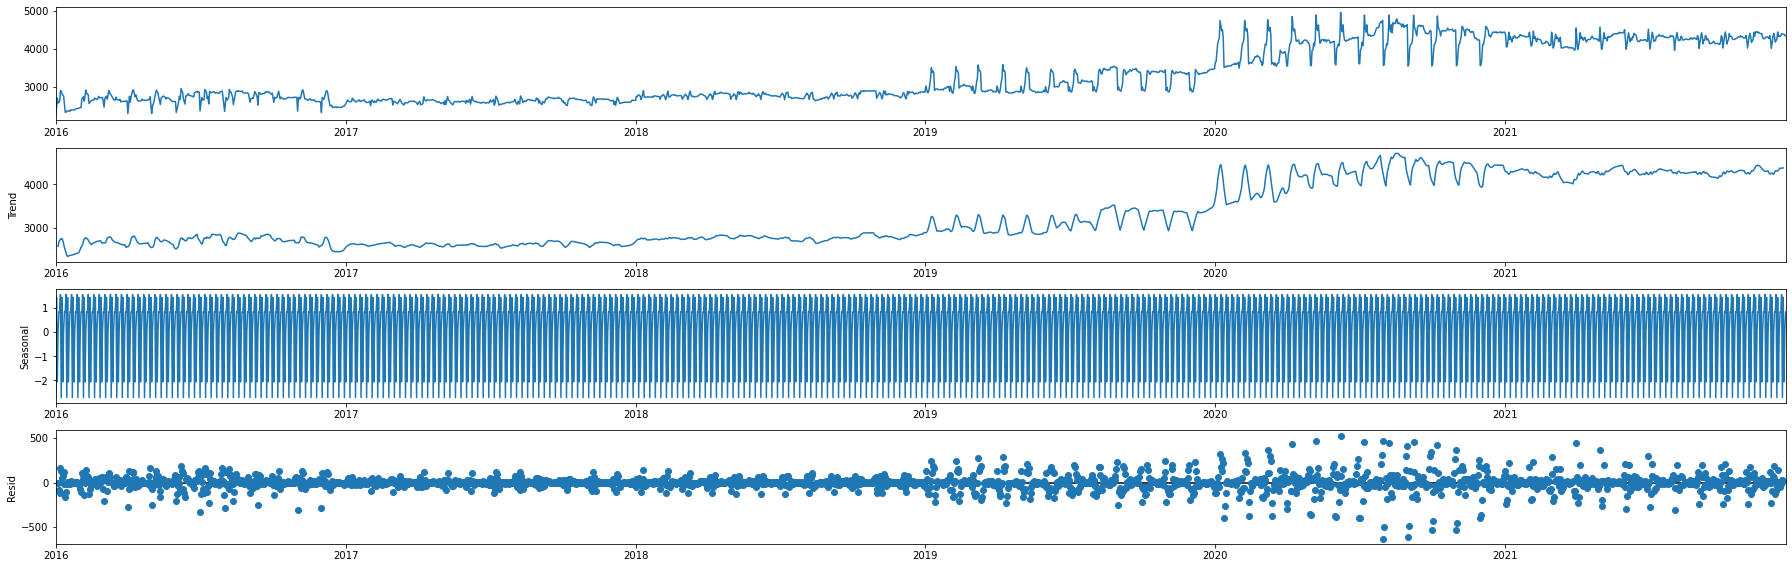

In [6]:
#Additive Decomposition
decomposition = seasonal_decompose(data, model='additive')
print(decomposition.trend)
print(decomposition.seasonal)
print(decomposition.resid)
print(decomposition.observed)
fig = decomposition.plot()
plt.rcParams['figure.figsize'] = (25, 8)

date
2016-01-02            NaN
2016-01-03            NaN
2016-01-04            NaN
2016-01-05    2678.207143
2016-01-06    2729.535714
                 ...     
2019-12-27    3454.514286
2019-12-28    3461.128571
2019-12-29            NaN
2019-12-30            NaN
2019-12-31            NaN
Name: trend, Length: 1460, dtype: float64
date
2016-01-02    1.005788
2016-01-03   -2.365480
2016-01-04   -1.946372
2016-01-05    1.533265
2016-01-06    0.454293
                ...   
2019-12-27   -1.517017
2019-12-28    1.005788
2019-12-29   -2.365480
2019-12-30   -1.946372
2019-12-31    1.533265
Name: seasonal, Length: 1460, dtype: float64
date
2016-01-02           NaN
2016-01-03           NaN
2016-01-04           NaN
2016-01-05    -81.990408
2016-01-06   -112.290007
                 ...    
2019-12-27     15.902731
2019-12-28      2.065641
2019-12-29           NaN
2019-12-30           NaN
2019-12-31           NaN
Name: resid, Length: 1460, dtype: float64
date
2016-01-02    2454.50
2016-01-03    2

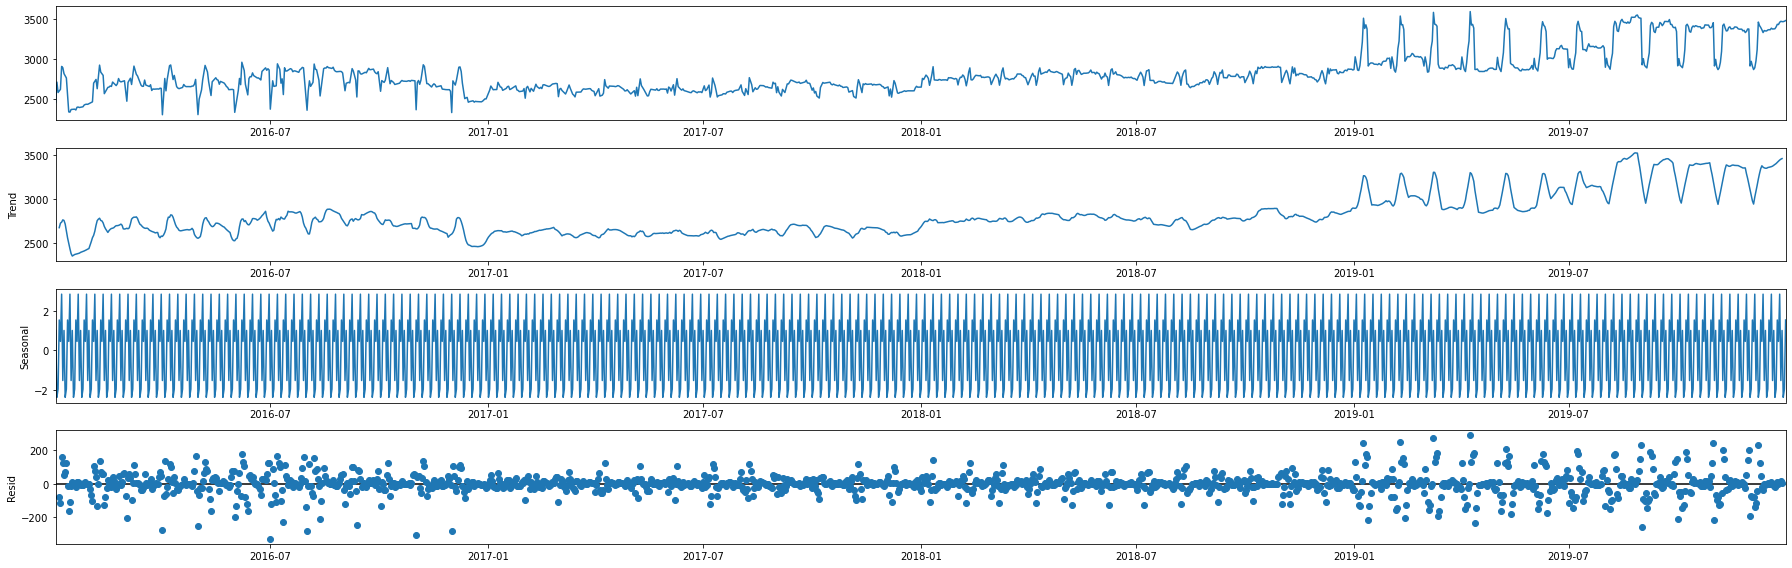

In [5]:
#Additive Decomposition
decomposition1 = seasonal_decompose(data.iloc[1:1461], model='additive')
print(decomposition1.trend)
print(decomposition1.seasonal)
print(decomposition1.resid)
print(decomposition1.observed)
fig = decomposition1.plot()
plt.rcParams['figure.figsize'] = (25, 8)

date
2016-01-02            NaN
2016-01-03            NaN
2016-01-04            NaN
2016-01-05    2678.207143
2016-01-06    2729.535714
                 ...     
2017-12-27    2625.261905
2017-12-28    2631.914286
2017-12-29            NaN
2017-12-30            NaN
2017-12-31            NaN
Name: trend, Length: 730, dtype: float64
date
2016-01-02   -3.753432
2016-01-03   -2.990043
2016-01-04    0.048935
2016-01-05    1.065397
2016-01-06    0.737329
                ...   
2017-12-27    0.737329
2017-12-28    6.714600
2017-12-29   -1.822785
2017-12-30   -3.753432
2017-12-31   -2.990043
Name: seasonal, Length: 730, dtype: float64
date
2016-01-02           NaN
2016-01-03           NaN
2016-01-04           NaN
2016-01-05    -81.522539
2016-01-06   -112.573043
                 ...    
2017-12-27      8.600766
2017-12-28     16.871114
2017-12-29           NaN
2017-12-30           NaN
2017-12-31           NaN
Name: resid, Length: 730, dtype: float64
date
2016-01-02    2454.500000
2016-01-03    

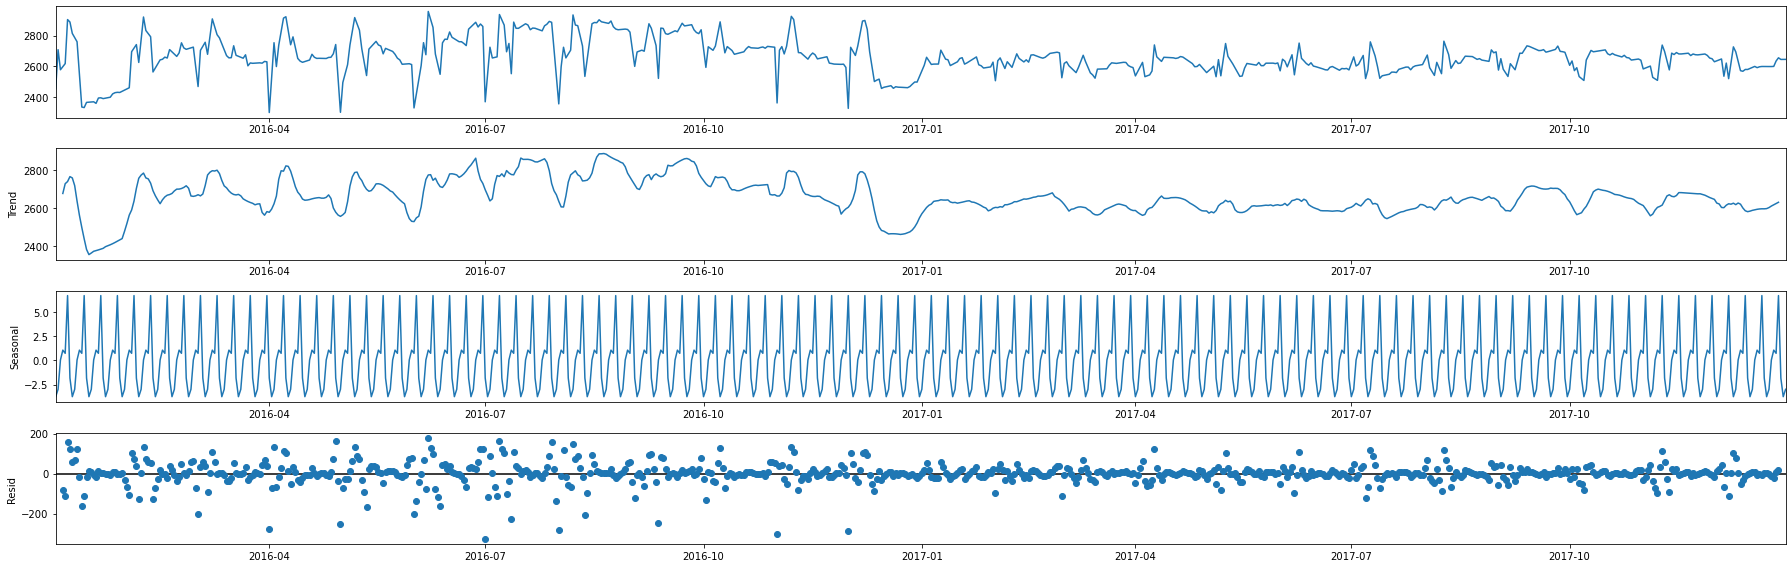

In [4]:
decomposition2 = seasonal_decompose(data.iloc[1:731], model='additive')
print(decomposition2.trend)
print(decomposition2.seasonal)
print(decomposition2.resid)
print(decomposition2.observed)
fig = decomposition2.plot()
plt.rcParams['figure.figsize'] = (25, 8)

date
2016-01-02            NaN
2016-01-03            NaN
2016-01-04            NaN
2016-01-05    2678.207143
2016-01-06    2729.535714
                 ...     
2016-12-27    2476.571429
2016-12-28    2486.700000
2016-12-29            NaN
2016-12-30            NaN
2016-12-31            NaN
Name: trend, Length: 365, dtype: float64
date
2016-01-02    -4.948756
2016-01-03    -6.773779
2016-01-04    -2.405665
2016-01-05     0.063811
2016-01-06     4.408774
                ...    
2016-12-27     0.063811
2016-12-28     4.408774
2016-12-29    12.025287
2016-12-30    -2.369671
2016-12-31    -4.948756
Name: seasonal, Length: 365, dtype: float64
date
2016-01-02           NaN
2016-01-03           NaN
2016-01-04           NaN
2016-01-05    -80.520953
2016-01-06   -116.244488
                 ...    
2016-12-27     -7.335239
2016-12-28     -6.808774
2016-12-29           NaN
2016-12-30           NaN
2016-12-31           NaN
Name: resid, Length: 365, dtype: float64
date
2016-01-02    2454.500000
201

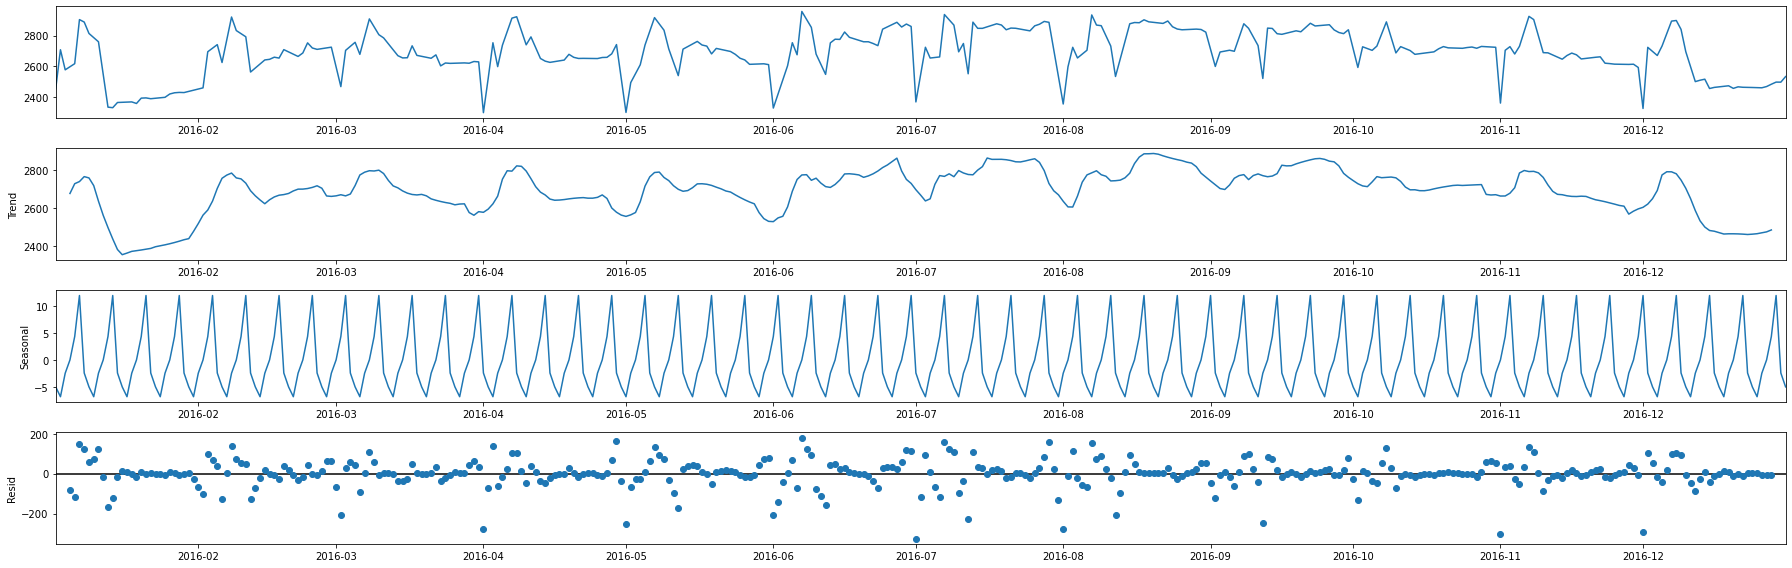

In [93]:
decomposition3 = seasonal_decompose(data.iloc[1:366], model='additive')
print(decomposition3.trend)
print(decomposition3.seasonal)
print(decomposition3.resid)
print(decomposition3.observed)
fig = decomposition3.plot()
plt.rcParams['figure.figsize'] = (25, 8)

date
2016-01-02            NaN
2016-01-03            NaN
2016-01-04            NaN
2016-01-05    2678.207143
2016-01-06    2729.535714
2016-01-07    2740.778571
2016-01-08    2766.778571
2016-01-09    2759.814286
2016-01-10    2719.514286
2016-01-11    2637.828571
2016-01-12    2563.257143
2016-01-13    2499.438095
2016-01-14    2439.657143
2016-01-15    2383.914286
2016-01-16    2356.828571
2016-01-17    2365.185714
2016-01-18    2374.271429
2016-01-19    2377.771429
2016-01-20    2381.523810
2016-01-21    2385.528571
2016-01-22    2389.785714
2016-01-23    2398.571429
2016-01-24    2403.528571
2016-01-25    2408.614286
2016-01-26    2414.314286
2016-01-27    2420.673810
2016-01-28    2427.692857
2016-01-29            NaN
2016-01-30            NaN
2016-01-31            NaN
Name: trend, dtype: float64
date
2016-01-02    14.215816
2016-01-03    15.644388
2016-01-04    30.582483
2016-01-05   -32.071088
2016-01-06   -69.188946
2016-01-07    11.789626
2016-01-08    29.027721
2016-01-09    

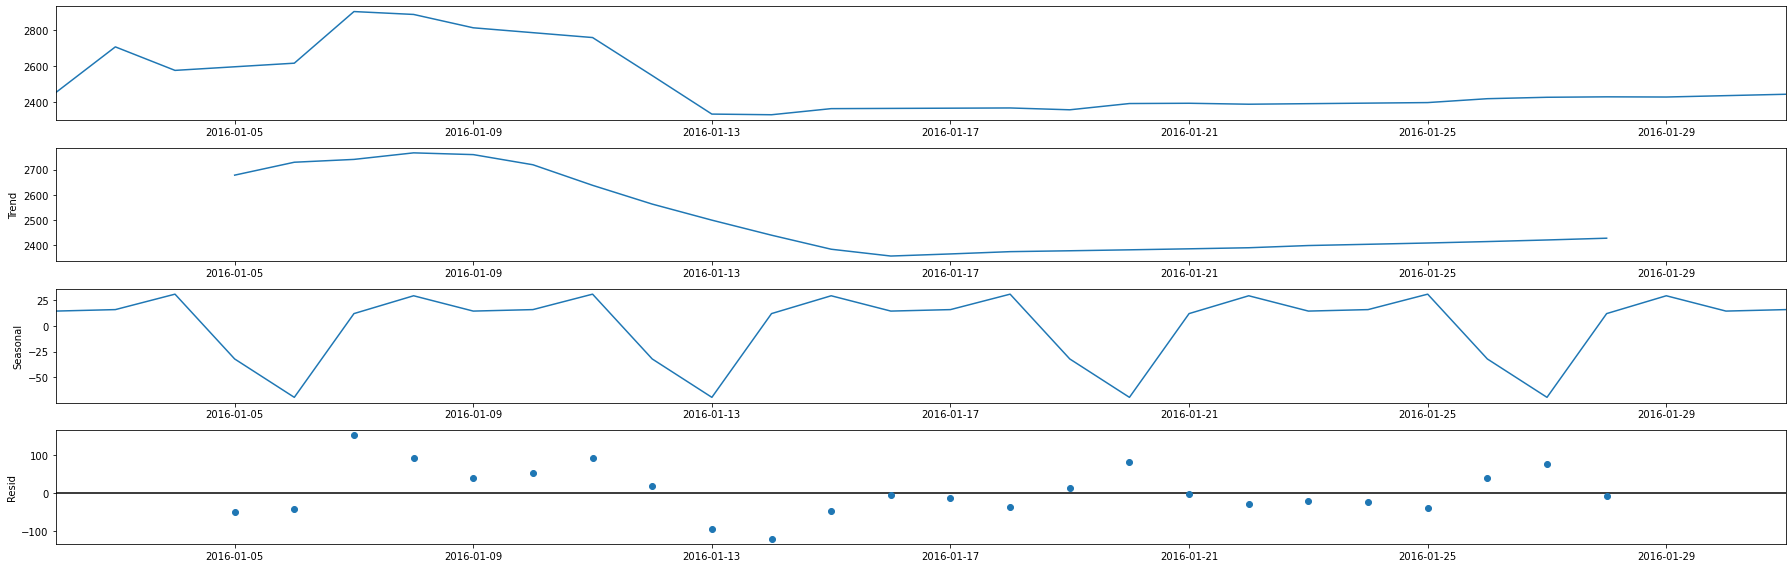

In [7]:
decomposition4 = seasonal_decompose(data.iloc[1:31], model='additive')
print(decomposition4.trend)
print(decomposition4.seasonal)
print(decomposition4.resid)
print(decomposition4.observed)
fig = decomposition4.plot()
plt.rcParams['figure.figsize'] = (25, 8)

date
2016-01-02            NaN
2016-01-03            NaN
2016-01-04            NaN
2016-01-05    2678.207143
2016-01-06    2729.535714
                 ...     
2016-12-27    2476.571429
2016-12-28    2486.700000
2016-12-29            NaN
2016-12-30            NaN
2016-12-31            NaN
Name: trend, Length: 365, dtype: float64
date
2016-01-02    0.998274
2016-01-03    0.997583
2016-01-04    0.999147
2016-01-05    1.000016
2016-01-06    1.001584
                ...   
2016-12-27    1.000016
2016-12-28    1.001584
2016-12-29    1.004282
2016-12-30    0.999114
2016-12-31    0.998274
Name: seasonal, Length: 365, dtype: float64
date
2016-01-02         NaN
2016-01-03         NaN
2016-01-04         NaN
2016-01-05    0.969943
2016-01-06    0.957511
                ...   
2016-12-27    0.997048
2016-12-28    0.997455
2016-12-29         NaN
2016-12-30         NaN
2016-12-31         NaN
Name: resid, Length: 365, dtype: float64
date
2016-01-02    2454.500000
2016-01-03    2708.100000
2016-01-04

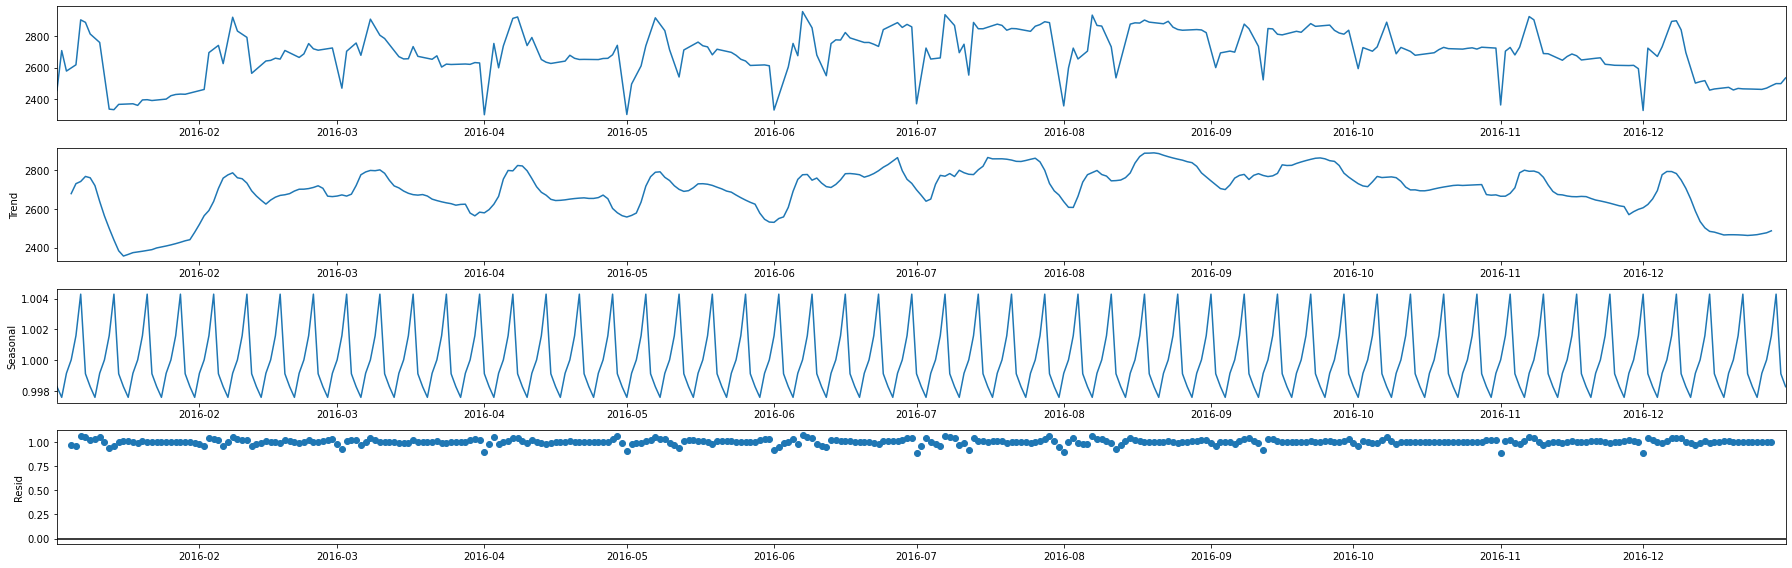

In [98]:
decomposition5 = seasonal_decompose(data.iloc[1:366], model='multiplicative')
print(decomposition5.trend)
print(decomposition5.seasonal)
print(decomposition5.resid)
print(decomposition5.observed)
fig = decomposition5.plot()
plt.rcParams['figure.figsize'] = (25, 8)

date
2016-01-02            NaN
2016-01-03            NaN
2016-01-04            NaN
2016-01-05    2678.207143
2016-01-06    2729.535714
2016-01-07    2740.778571
2016-01-08    2766.778571
2016-01-09    2759.814286
2016-01-10    2719.514286
2016-01-11    2637.828571
2016-01-12    2563.257143
2016-01-13    2499.438095
2016-01-14    2439.657143
2016-01-15    2383.914286
2016-01-16    2356.828571
2016-01-17    2365.185714
2016-01-18    2374.271429
2016-01-19    2377.771429
2016-01-20    2381.523810
2016-01-21    2385.528571
2016-01-22    2389.785714
2016-01-23    2398.571429
2016-01-24    2403.528571
2016-01-25    2408.614286
2016-01-26    2414.314286
2016-01-27    2420.673810
2016-01-28    2427.692857
2016-01-29            NaN
2016-01-30            NaN
2016-01-31            NaN
Name: trend, dtype: float64
date
2016-01-02    1.005635
2016-01-03    1.006092
2016-01-04    1.011867
2016-01-05    0.988272
2016-01-06    0.973974
2016-01-07    1.003653
2016-01-08    1.010506
2016-01-09    1.00563

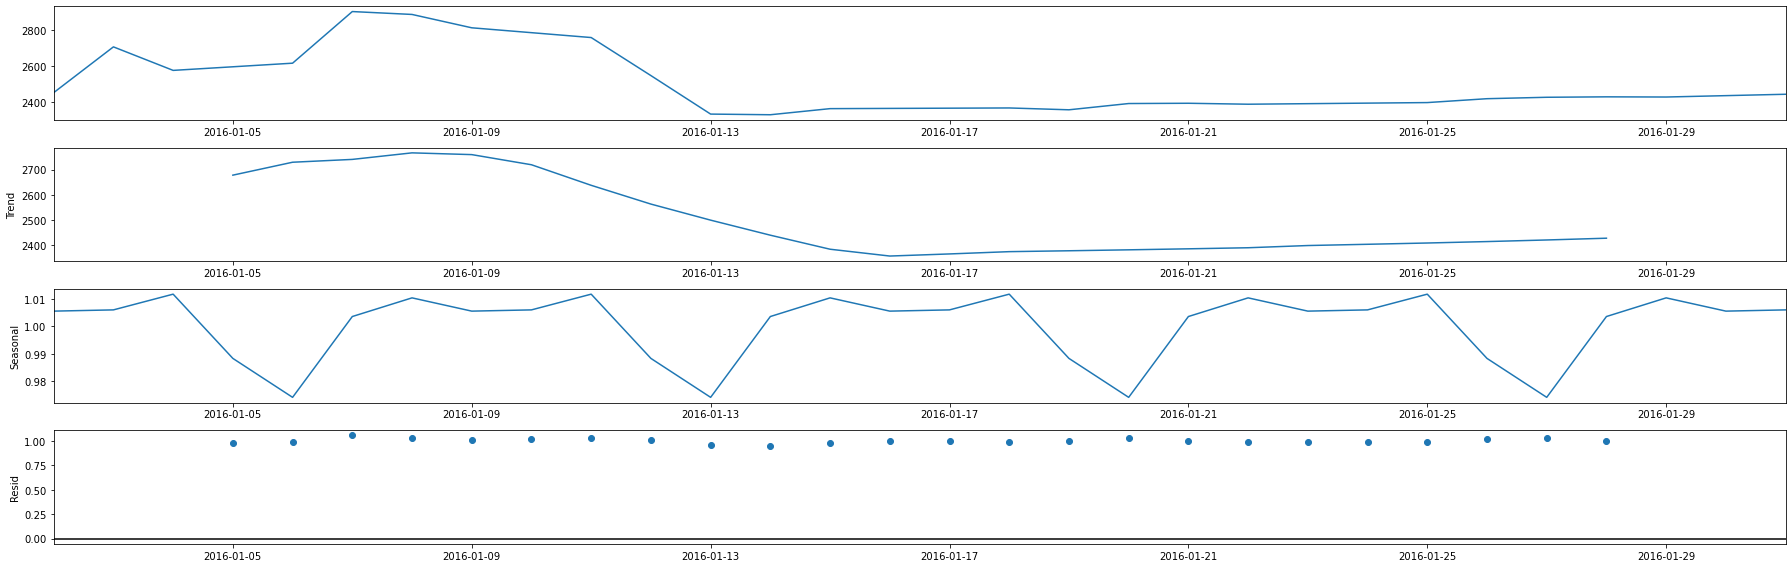

In [5]:
decomposition6 = seasonal_decompose(data.iloc[1:31], model='multiplicative')
print(decomposition6.trend)
print(decomposition6.seasonal)
print(decomposition6.resid)
print(decomposition6.observed)
fig = decomposition6.plot()
plt.rcParams['figure.figsize'] = (25, 8)

#so from the graph we got to know that our data has weekly seasonality and our data is multiplicative series

## checking for stationrity

In [6]:
#ADFuller Test for stationarity
adf = adfuller(data["price"])[1]
print(f"p value:{adf.round(4)}", ", Series is Stationary" if adf <0.05 else ", Series is Non-Stationary")

p value:0.9241 , Series is Non-Stationary


# Differencing

p value:0.0 , Series is Stationary


<AxesSubplot:xlabel='date'>

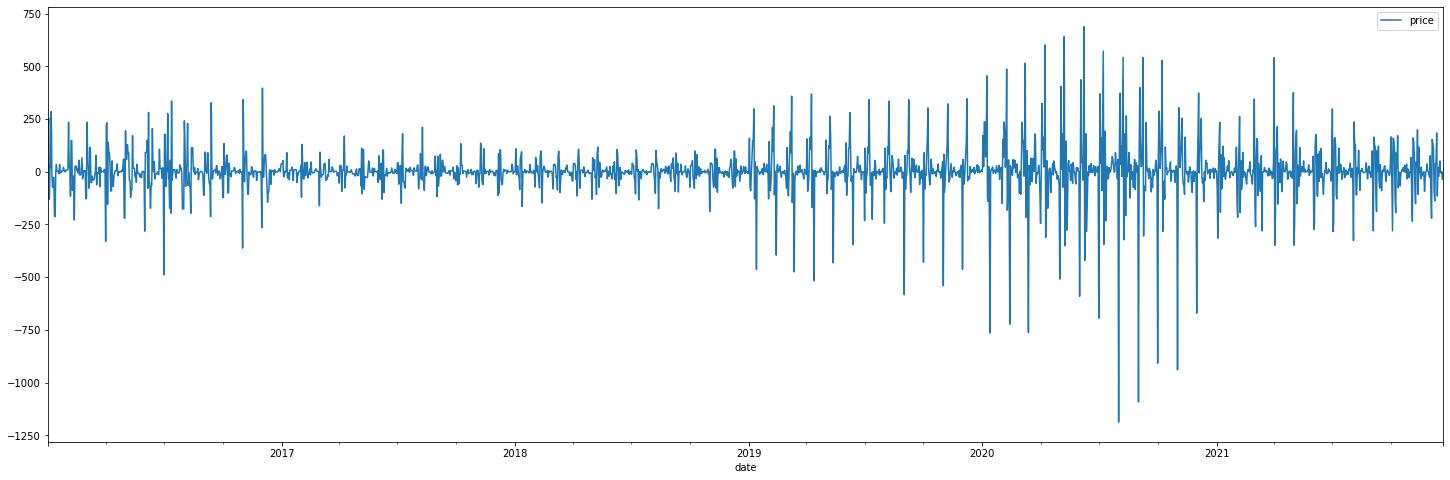

In [7]:
#differencing to make data into stationarity
de_trended = data.diff(1).dropna()
adf2 = adfuller(de_trended)[1]
print(f"p value:{adf2}", ", Series is Stationary" if adf2 <0.05 else ", Series is Non-Stationary")
de_trended.plot()

# ACF plot

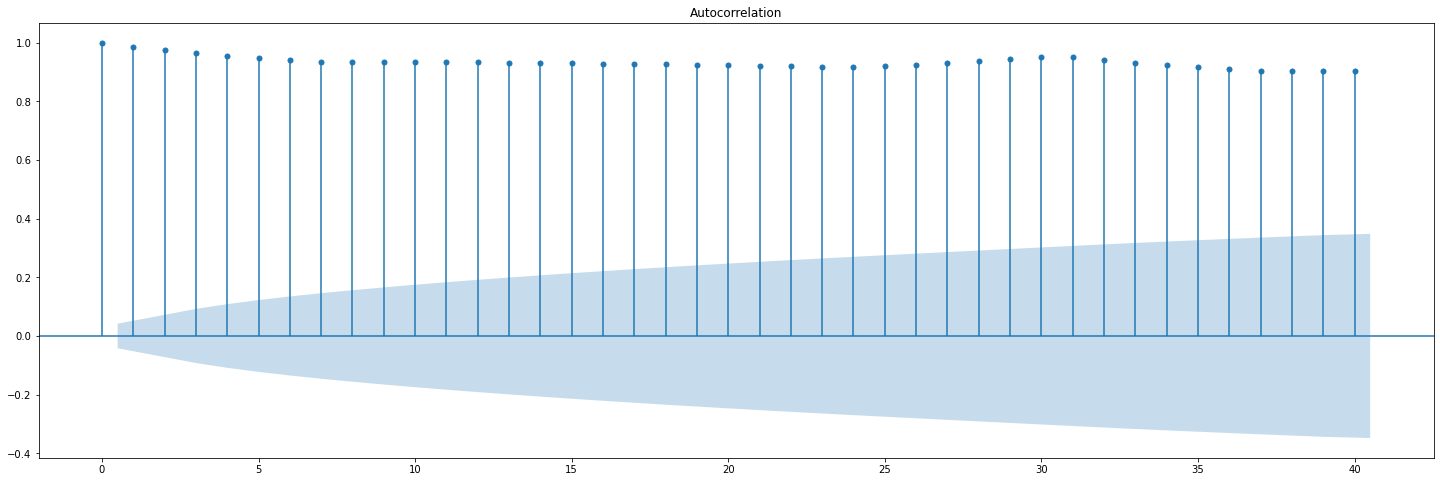

<Figure size 2880x720 with 0 Axes>

In [8]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data,lags = 40)
plt.figure(figsize = (40,10))
plt.show()

is graph show as that our data is highly coreleted but for predition we need non coreleted and this is non stationarity data acf plot

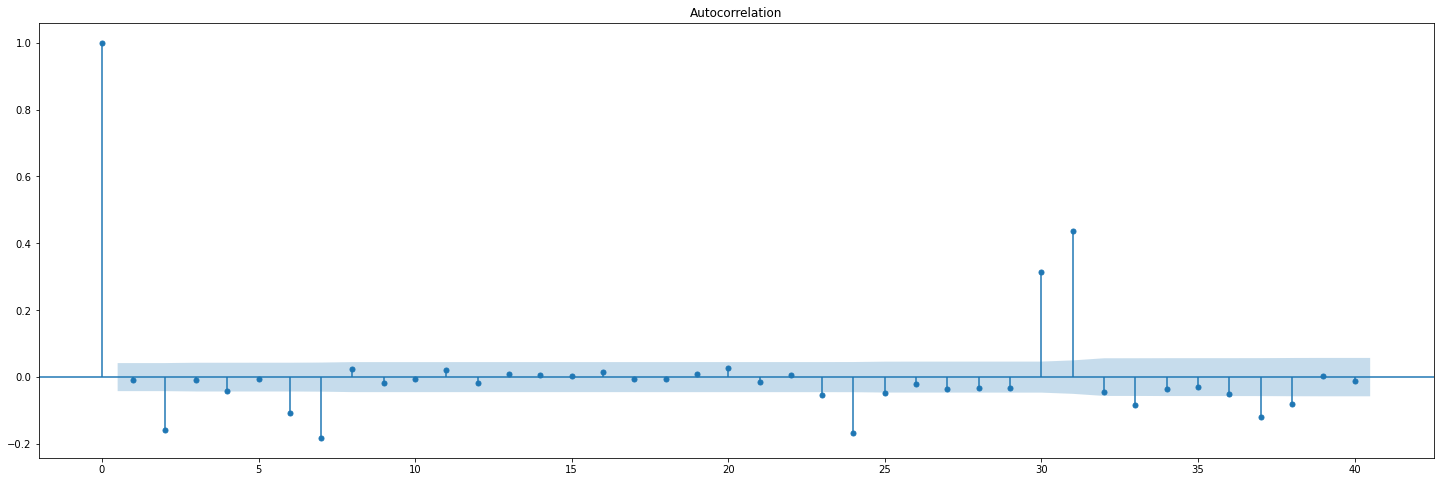

<Figure size 1440x720 with 0 Axes>

In [9]:
#ACF Plot after Differencing
plot_acf(de_trended,lags = 40)
plt.figure(figsize = (20,10))
plt.show()

from here we can decied q value is 0 , 2 and 6 or 7  

# PACF Plots

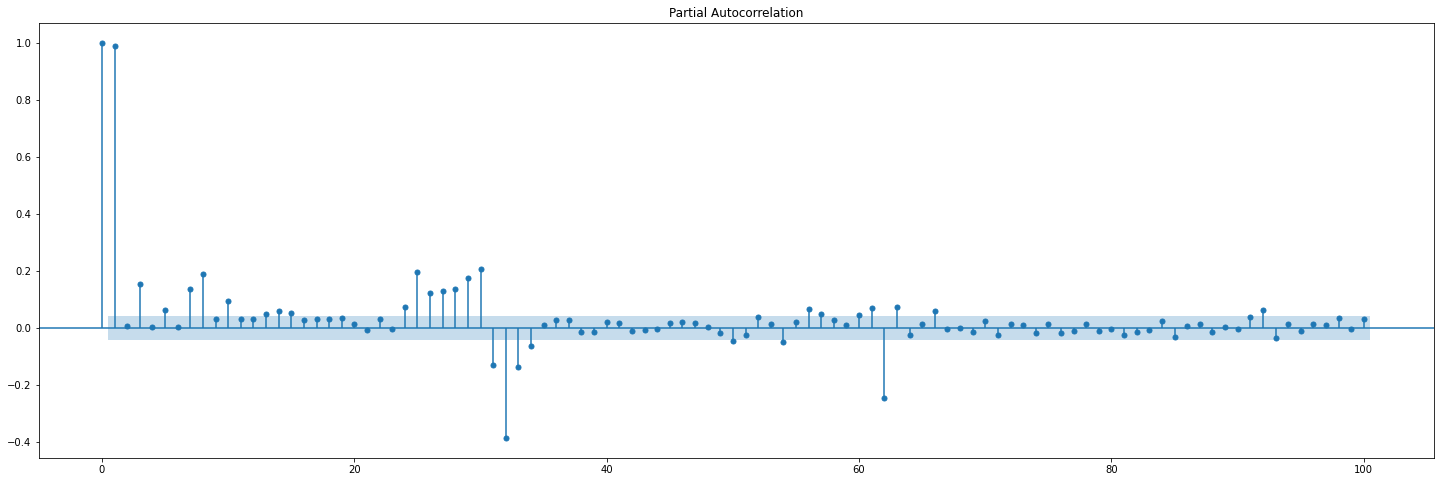

<Figure size 1440x720 with 0 Axes>

In [23]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data,lags = 100)
plt.figure(figsize = (20,10))
plt.show()

is graph show as that our data is coreleted but for predition we need non coreleted and this is non stationarity data pacf plot

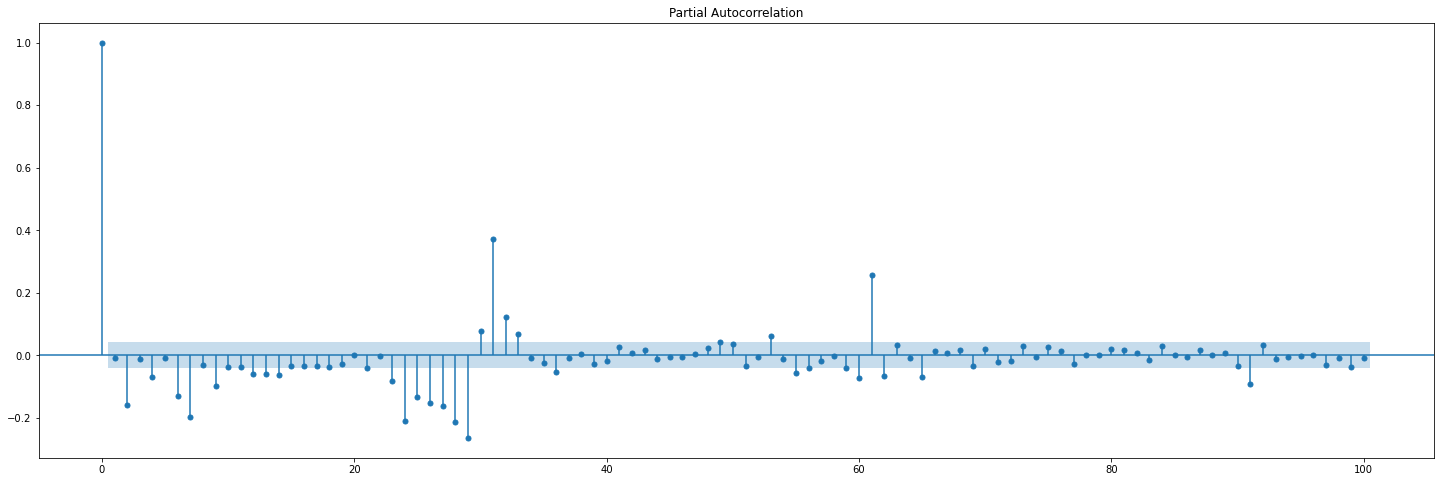

<Figure size 1440x720 with 0 Axes>

In [24]:
#PACF Plot after Differencing
plot_pacf(de_trended,lags = 100)
plt.figure(figsize = (20,10))
plt.show()

here we can see clearly the pattern for acf so from here we got p value form 0 ,2 ,4 ,6 7

## Splitting the data into train and test

In [3]:
data_train = data.iloc[0:1530]
data_test = data.iloc[1530:]

In [23]:
data_train.shape
data_train.head

<bound method NDFrame.head of               price
date               
2016-01-01  2252.60
2016-01-02  2454.50
2016-01-03  2708.10
2016-01-04  2577.80
2016-01-05  2597.75
...             ...
2020-03-05  4127.50
2020-03-06  4106.50
2020-03-07  4255.00
2020-03-08  4769.80
2020-03-09  4553.60

[1530 rows x 1 columns]>

In [13]:
data_test.shape
data_test.head

<bound method NDFrame.head of              price
date              
2020-03-10  4472.6
2020-03-11  4572.6
2020-03-12  4364.6
2020-03-13  3601.7
2020-03-14  3631.3
...            ...
2021-12-17  4394.4
2021-12-18  4389.5
2021-12-19  4389.5
2021-12-20  4354.1
2021-12-21  4346.5

[652 rows x 1 columns]>

# ARIMA

In [26]:
# 1,1,1 ARIMA Model
model = ARIMA(data_train, order=(2,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D wil

                             ARIMA Model Results                              
Dep. Variable:                D.price   No. Observations:                 1529
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -8944.325
Method:                       css-mle   S.D. of innovations             83.964
Date:                Wed, 27 Jul 2022   AIC                          17900.650
Time:                        13:24:27   BIC                          17932.645
Sample:                    01-02-2016   HQIC                         17912.558
                         - 03-09-2020                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.0365      0.495      2.096      0.036       0.067       2.006
ar.L1.D.price     1.8040      0.023     77.798      0.000       1.759       1.849
ar.L2.D.price    -0.8474      0.020    -

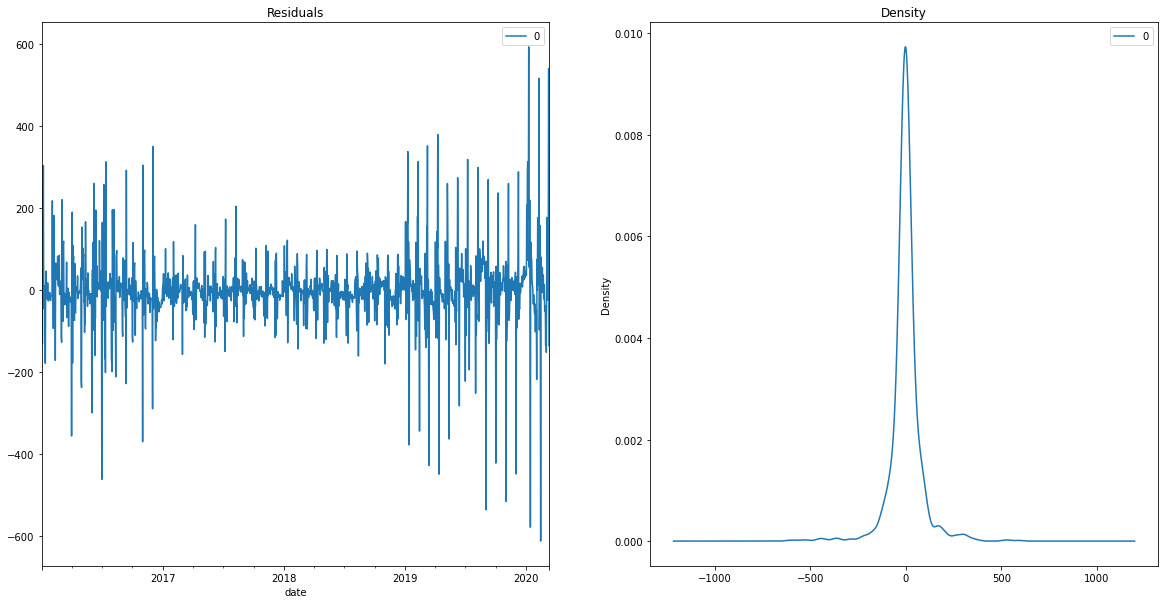

date
2016-01-02    200.863490
2016-01-03    250.423322
2016-01-04   -131.607496
2016-01-05     29.428085
2016-01-06     33.752229
                 ...    
2020-03-05    124.828995
2020-03-06    -24.807308
2020-03-07    153.079837
2020-03-08    540.460229
2020-03-09   -135.946953
Length: 1529, dtype: float64


In [27]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1],figsize=(20,10))
plt.show()
print(model_fit.resid)

In [28]:
residuals.describe()

,0
count,1529.000000
mean,0.119153
std,84.082349
min,-612.711111
25%,-23.625014
50%,-1.702921
75%,23.233021
max,593.574441


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


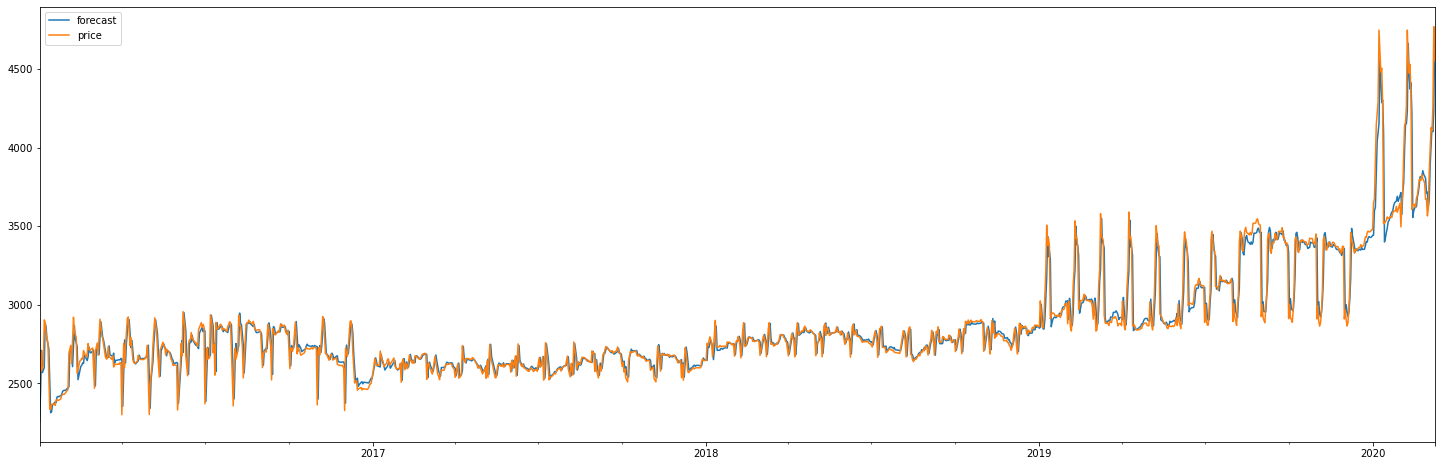

In [29]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
figsize = (20,10)
plt.show()

In [30]:
fc, se, conf = model_fit.forecast(652, alpha=0.05)  # 95% conf
fc, se, conf

(array([4469.74604605, 4379.57328068, 4288.00403118, 4199.27015229,
        4116.83473428, 4043.35911889, 3980.70974142, 3929.99842491,
        3891.64927365, 3865.48520434, 3850.82736331, 3846.60114929,
        3851.44323268, 3863.80477513, 3882.04694965, 3904.52579111,
        3929.66432261, 3956.01076947, 3982.28245721, 4007.39567303,
        4030.48233653, 4050.89476911, 4068.20017088, 4082.16661533,
        4092.74246384, 4100.03109727, 4104.26277593, 4105.76528709,
        4104.93483898, 4102.20842665, 4098.03864442, 4092.87166464,
        4087.12885523, 4081.19227854, 4075.39410865, 4070.00982833,
        4065.25492432, 4061.2846905 , 4058.19667315, 4056.03524926,
        4054.79781359, 4054.44206047, 4054.8938775 , 4056.05541497,
        4057.81295416, 4060.04426376, 4062.62520315, 4065.43540103,
        4068.36290396, 4071.30775033, 4074.18447857, 4076.92362337,
        4079.47228947, 4081.79391878, 4083.86738405, 4085.6855512 ,
        4087.25345377, 4088.58621789, 4089.70686

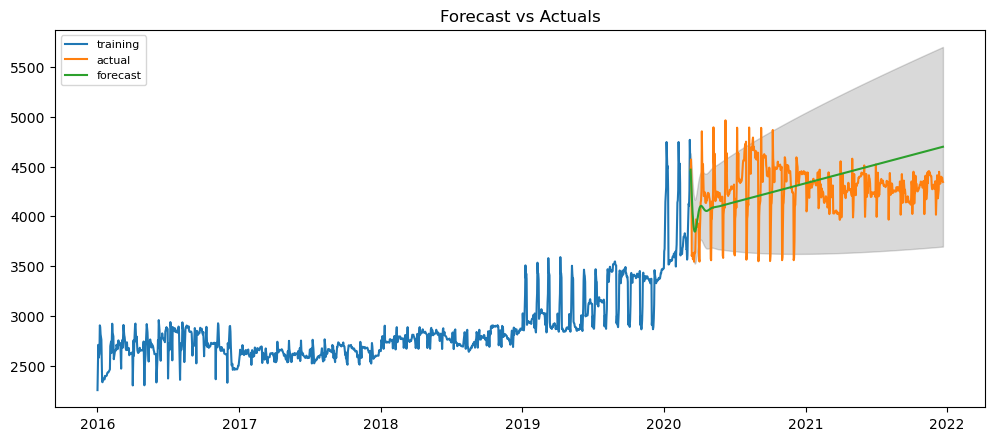

In [31]:
# Make as pandas series
fc_series = pd.Series(fc, index=data_test.index)
lower_series = pd.Series(conf[:, 0], index=data_test.index)
upper_series = pd.Series(conf[:, 1], index=data_test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(data_train, label='training')
plt.plot(data_test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [32]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
print(np.sqrt(metrics.mean_squared_error(data_test,fc_series)))
print(mean_absolute_percentage_error(data_test,fc_series)*100)

295.9964299539972
5.914389835696849


# GRID search

In [125]:
import itertools
#set parameter range
p = range(0,8)
q = range(0,6)
d = range(0,3)
# list of all parameter combos
pdq = list(itertools.product(p, d, q))
# SARIMA model pipeline
for param in pdq:
        try:
            mod = ARIMA(data_train,order=param)
            results = mod.fit(max_iter = 70)
            print('ARIMA{} - AIC:{}'.format(param, results.aic))
        except:
            continue

C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 0, 0) - AIC:22171.76900143992
ARIMA(0, 0, 1) - AIC:20571.21502754804


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 0, 2) - AIC:19636.958086798993


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 0, 3) - AIC:19163.880564735642


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 0, 4) - AIC:18795.314514233498


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 0, 5) - AIC:18618.21125030086
ARIMA(0, 1, 0) - AIC:18031.119802376354
ARIMA(0, 1, 1) - AIC:18031.757059605698
ARIMA(0, 1, 2) - AIC:18033.221277598204


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

ARIMA(0, 1, 3) - AIC:18034.748329504175


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 1, 4) - AIC:18028.193940930152


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 1, 5) - AIC:17959.926943690007
ARIMA(0, 2, 0) - AIC:19028.27374993675


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 2, 1) - AIC:18029.362521188566


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 2, 2) - AIC:18029.96486727426


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 2, 3) - AIC:18031.45482001069


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 2, 4) - AIC:18032.938168356985


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 2, 5) - AIC:18026.68623167609
ARIMA(1, 0, 0) - AIC:18033.377999769637


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 0, 1) - AIC:18031.97049655859


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 0, 2) - AIC:18033.9609070721


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 0, 3) - AIC:18033.05539930579


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 0, 4) - AIC:18033.574037801278


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 0, 5) - AIC:17981.708149797923
ARIMA(1, 1, 0) - AIC:18031.803809416182


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 1) - AIC:17955.928813318496


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 2) - AIC:17939.46411945101


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 3) - AIC:17936.560665636505


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 4) - AIC:17916.787605321202


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 5) - AIC:17902.4250190561
ARIMA(1, 2, 0) - AIC:18634.668873822156


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 2, 1) - AIC:18030.012271223855


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 2, 2) - AIC:18032.827044426514


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 2, 3) - AIC:18033.72213499748


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 2, 4) - AIC:18035.338549502183


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(2, 0, 0) - AIC:18031.982222657127


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(2, 0, 1) - AIC:18033.68873700333


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(2, 0, 2) - AIC:17976.285813360446


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(2, 0, 3) - AIC:17968.157635659303


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(2, 0, 4) - AIC:17953.375424017824


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(2, 1, 0) - AIC:18033.35271507593


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(2, 1, 1) - AIC:17936.213220570826


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(2, 1, 2) - AIC:17900.650440594065


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(2, 1, 3) - AIC:17901.01357976452


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(2, 1, 4) - AIC:17899.426654918367


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(2, 1, 5) - AIC:17900.286643819847


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(2, 2, 0) - AIC:18442.922822347835


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(2, 2, 1) - AIC:18031.584988016104


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(2, 2, 2) - AIC:18033.04747235544


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(2, 2, 3) - AIC:18029.21189926853


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

ARIMA(3, 0, 0) - AIC:18033.98062026062


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(3, 0, 1) - AIC:17965.486773638615


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(3, 0, 2) - AIC:17952.405763021718


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency info

ARIMA(3, 0, 4) - AIC:17935.47525024745
ARIMA(3, 1, 0) - AIC:18034.868558801016


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(3, 1, 1) - AIC:17927.88619035196


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(3, 1, 2) - AIC:17938.45754568436


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(3, 1, 3) - AIC:17904.22368664501


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(3, 1, 4) - AIC:17900.83509294255


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(3, 1, 5) - AIC:17898.271623982102


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(3, 2, 0) - AIC:18390.40781413331


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(3, 2, 1) - AIC:18033.071774029362


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

ARIMA(4, 0, 0) - AIC:18034.2116491272


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(4, 0, 1) - AIC:17957.788261860827


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(4, 0, 2) - AIC:17970.13865004901


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(4, 0, 3) - AIC:17961.117850219867


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency info

ARIMA(4, 0, 4) - AIC:17953.472630290762
ARIMA(4, 1, 0) - AIC:18028.709335334606


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(4, 1, 1) - AIC:17902.508497459115


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(4, 1, 2) - AIC:17901.144686011663


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(4, 1, 3) - AIC:17900.287637130554


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(4, 1, 4) - AIC:17902.275896726394


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(4, 1, 5) - AIC:17900.001272607253


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(4, 2, 0) - AIC:18375.030303911135


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

ARIMA(5, 0, 0) - AIC:18031.183860659945


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(5, 0, 1) - AIC:17932.829346096267


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(5, 0, 2) - AIC:17932.40353885253


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(5, 0, 3) - AIC:17933.99996192306


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency info

ARIMA(5, 0, 4) - AIC:17935.813645496048
ARIMA(5, 1, 0) - AIC:17998.213305522106


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(5, 1, 1) - AIC:17899.511996153276


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(5, 1, 2) - AIC:17897.72045859525


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(5, 1, 3) - AIC:17899.578846990487


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(5, 1, 4) - AIC:17901.560468119384


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(5, 2, 0) - AIC:18336.170622352714


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(5, 2, 1) - AIC:17996.728517689666


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(5, 2, 3) - AIC:17893.372413525285


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(5, 2, 4) - AIC:18024.649232529086


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(5, 2, 5) - AIC:18019.238215270758


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(6, 0, 0) - AIC:18005.96793441385


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(6, 0, 1) - AIC:17930.438845279263


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(6, 0, 2) - AIC:17928.08558686085


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(6, 0, 3) - AIC:17930.41982147614


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(6, 1, 0) - AIC:17988.42178412849


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(6, 1, 1) - AIC:17900.33820944066


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(6, 1, 2) - AIC:17899.59064875457


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(6, 1, 3) - AIC:17901.576924411063


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(6, 1, 4) - AIC:17899.2807403554


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(6, 2, 0) - AIC:18318.34866159239


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

ARIMA(6, 2, 3) - AIC:17895.836973198988


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(6, 2, 4) - AIC:17897.86345150726
ARIMA(7, 0, 0) - AIC:17998.512071635247


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(7, 0, 1) - AIC:17923.61234492816


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(7, 0, 2) - AIC:17929.99057726782


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(7, 0, 3) - AIC:17934.385369725576


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(7, 1, 0) - AIC:17963.38063638357


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(7, 1, 1) - AIC:17902.033151820655


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(7, 1, 2) - AIC:17901.50928556775


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(7, 1, 3) - AIC:17892.115492192574


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(7, 1, 4) - AIC:17871.566116912953


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(7, 2, 0) - AIC:18268.581140210306


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(7, 2, 1) - AIC:17962.125229429235


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informati

ARIMA(7, 2, 2) - AIC:17898.31485735985


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(7, 2, 3) - AIC:17900.58785727932


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(7, 2, 4) - AIC:17900.677832534908
ARIMA(7, 2, 5) - AIC:17883.40379282813


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


so from here we got 7 1 4 is the best pdq value as per lowest AIC

In [129]:
!pip install pmdarima

In [33]:
import pmdarima as pm
model = pm.auto_arima(data_train, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=7, max_q=5, # maximum p and q
                      m=0,              # frequency of series
                      d=1,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=18033.042, Time=0.94 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=18031.120, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=18031.787, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=18031.734, Time=0.61 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=18029.568, Time=0.05 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.869 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1530
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -9013.784
Date:                Wed, 27 Jul 2022   AIC                          18029.568
Time:                        13:27:07   BIC                          18034.901
Sample:                             0   HQIC                         18031.553
                               - 1530                                  

from this we got 1.0.1 is best model but AIC is 18031 and from grid we got 17871 so we ll go with grid

In [4]:
model_1 = ARIMA(data_train, order=(7,1,4))
model_1_fit = model_1.fit(disp=0)
print(model_1_fit.summary())

C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D wil

                             ARIMA Model Results                              
Dep. Variable:                D.price   No. Observations:                 1529
Model:                 ARIMA(7, 1, 4)   Log Likelihood               -8922.783
Method:                       css-mle   S.D. of innovations             82.771
Date:                Fri, 29 Jul 2022   AIC                          17871.566
Time:                        15:41:05   BIC                          17940.887
Sample:                    01-02-2016   HQIC                         17897.366
                         - 03-09-2020                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.9643      0.390      2.472      0.013       0.200       1.729
ar.L1.D.price     1.3659      0.134     10.216      0.000       1.104       1.628
ar.L2.D.price    -0.4909      0.280     

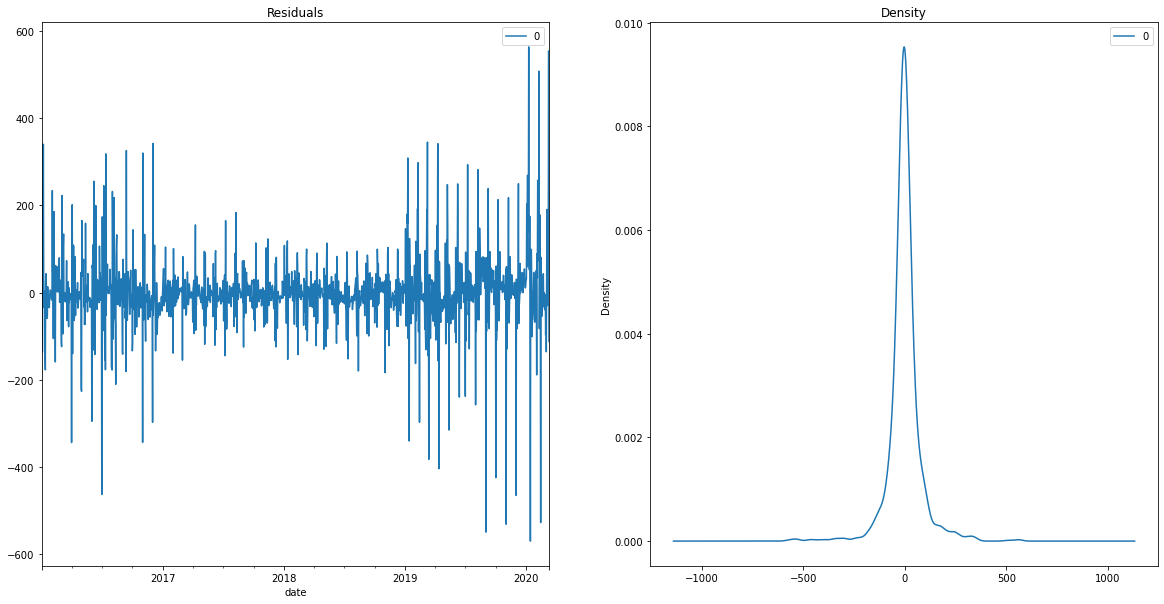

date
2016-01-02    200.935654
2016-01-03    245.624724
2016-01-04   -136.724338
2016-01-05     24.529632
2016-01-06     26.452215
                 ...    
2020-03-05    147.056261
2020-03-06    -29.993365
2020-03-07    163.349039
2020-03-08    555.009856
2020-03-09   -112.424800
Length: 1529, dtype: float64


In [5]:
# Plot residual errors
residuals1 = pd.DataFrame(model_1_fit.resid)
fig, ax = plt.subplots(1,2)
residuals1.plot(title="Residuals", ax=ax[0])
residuals1.plot(kind='kde', title='Density', ax=ax[1],figsize=(20,10))
plt.show()
print(model_1_fit.resid)

In [6]:
residuals1.describe()

,0
count,1529.000000
mean,0.307802
std,82.922189
min,-571.026382
25%,-25.132386
50%,-2.178245
75%,23.546925
max,564.268993


C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


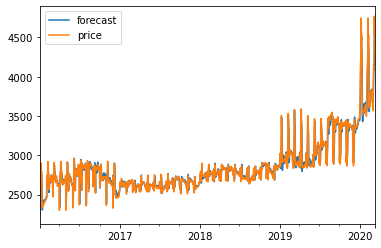

In [7]:
# Actual vs Fitted
model_1_fit.plot_predict(dynamic=False)
figsize = (20,10)
plt.show()

In [8]:
# Forecast
fc, se, conf = model_1_fit.forecast(652, alpha=0.05)  # 95% conf
fc, se, conf 

(array([4444.35125736, 4378.58952049, 4253.47659394, 4117.99026141,
        4044.2285969 , 3976.19765473, 3956.85680649, 3954.10325186,
        3968.7433372 , 3970.69126661, 3971.29223059, 3962.78331623,
        3964.01204352, 3971.41667055, 3989.00232853, 4002.63563022,
        4009.5023153 , 4003.99584872, 3994.77047022, 3987.32866946,
        3989.29591639, 3997.75918605, 4008.113341  , 4012.42005834,
        4009.38993053, 4001.42359668, 3995.57791666, 3995.9387374 ,
        4002.91430999, 4011.52599859, 4016.59024107, 4015.2273983 ,
        4009.67230772, 4004.60685064, 4004.37063492, 4009.40211063,
        4016.61922506, 4021.42958939, 4021.35138687, 4017.36786689,
        4013.23427628, 4012.49760973, 4016.16858018, 4022.05007636,
        4026.57736703, 4027.31919726, 4024.68089797, 4021.38650122,
        4020.4722799 , 4023.09912595, 4027.88800661, 4032.01754516,
        4033.31431161, 4031.71758359, 4029.20607107, 4028.27093585,
        4030.14808282, 4034.02085243, 4037.72758

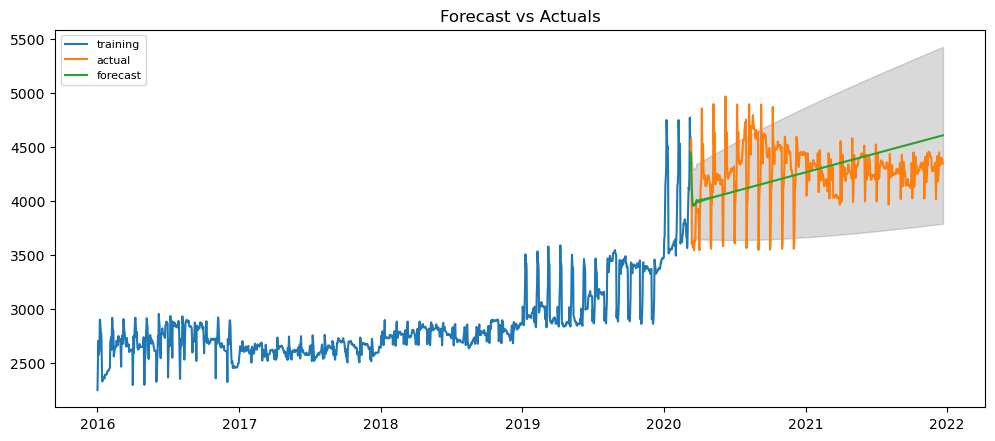

In [9]:
# Make as pandas series
fc_series1 = pd.Series(fc, index=data_test.index)
lower_series = pd.Series(conf[:, 0], index=data_test.index)
upper_series = pd.Series(conf[:, 1], index=data_test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(data_train, label='training')
plt.plot(data_test, label='actual')
plt.plot(fc_series1, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [24]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
print(np.sqrt(metrics.mean_squared_error(data_test,fc_series1)))
print(mean_absolute_percentage_error(data_test,fc_series1)*100)

277.64929947140104
5.380044190760327


# SARIMA

In [26]:
import statsmodels.api as sm
#mod1 = sm.tsa.statespace.SARIMAX(data_train,order = (1,1,1),seasonal_order = (1,1,1,4))
mod1 = sm.tsa.statespace.SARIMAX(data_train,order = (2,1,2),seasonal_order = (2,1,2,12))
#mod1 = sm.tsa.statespace.SARIMAX(data_train,order = (1,1,1),seasonal_order = (1,1,1,52))
result = mod1.fit()
print(result.summary())

C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\base\model.py:566: C

                                     SARIMAX Results                                      
Dep. Variable:                              price   No. Observations:                 1530
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood               -8935.318
Date:                            Wed, 27 Jul 2022   AIC                          17888.636
Time:                                    14:13:30   BIC                          17936.557
Sample:                                01-01-2016   HQIC                         17906.478
                                     - 03-09-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1425      0.020     -7.085      0.000      -0.182      -0.103
ar.L2          0.8375      0.020   

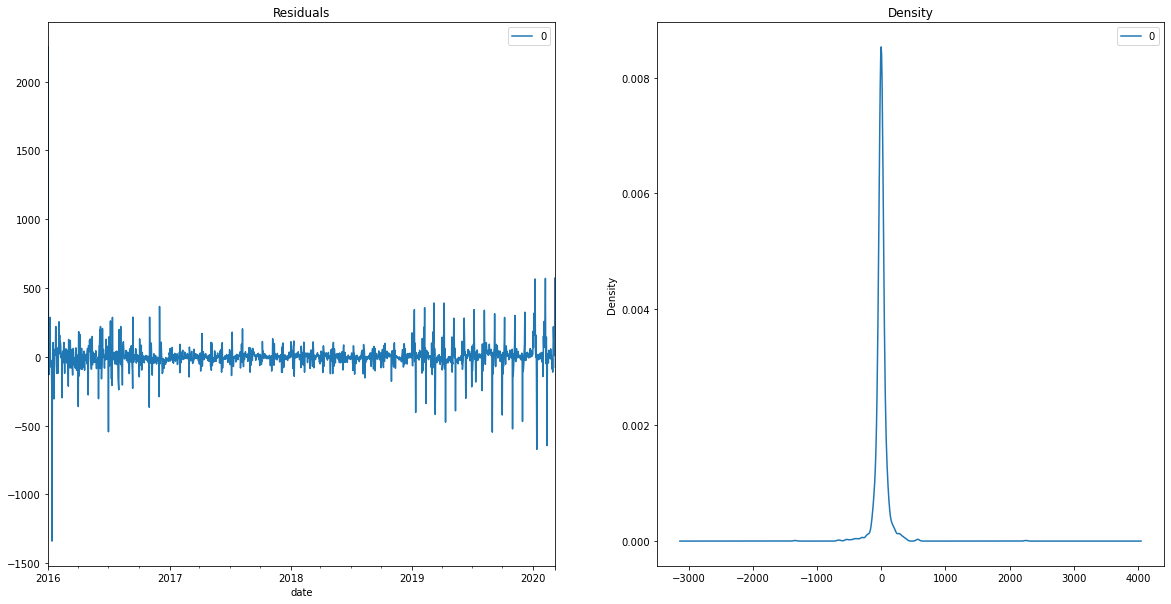

date
2016-01-01    2252.600000
2016-01-02     202.963327
2016-01-03     254.668501
2016-01-04    -129.223040
2016-01-05      20.683236
                 ...     
2020-03-05     192.414009
2020-03-06       8.859698
2020-03-07     203.193998
2020-03-08     573.585619
2020-03-09     -77.241836
Length: 1530, dtype: float64


In [35]:
residuals2 = pd.DataFrame(result.resid)
fig, ax = plt.subplots(1,2)
residuals2.plot(title="Residuals", ax=ax[0])
residuals2.plot(kind='kde', title='Density', ax=ax[1],figsize=(20,10))
plt.show()
print(result.resid)

In [36]:
residuals2.describe()

,0
count,1530.000000
mean,2.827581
std,110.879998
min,-1339.890722
25%,-22.613587
50%,0.965850
75%,24.705619
max,2252.600000


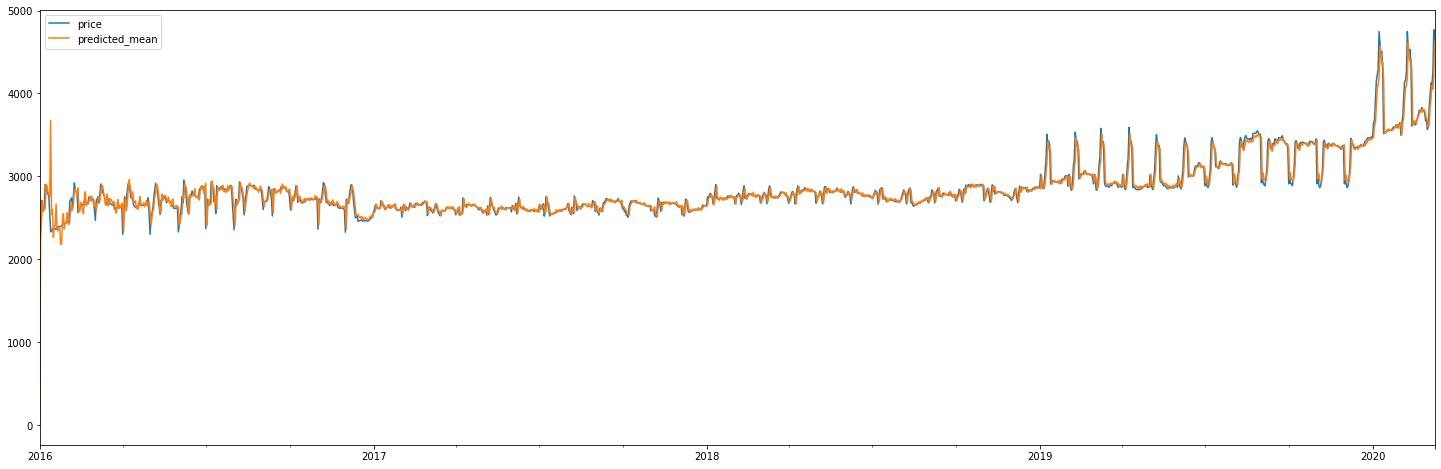

In [37]:
# Actual vs Fitted
forecast = result.predict(dynamic=False)
pd.concat([data_train,forecast],axis=1).plot()
figsize = (20,10)
plt.show()

In [38]:
# Forecast
fc = result.forecast(652, alpha=0.05)  # 95% conf
fc

2020-03-10    4470.914829
2020-03-11    4377.816526
2020-03-12    4314.433144
2020-03-13    4247.615320
2020-03-14    4204.917101
                 ...     
2021-12-17    4528.188018
2021-12-18    4537.903793
2021-12-19    4534.423888
2021-12-20    4535.424468
2021-12-21    4535.030043
Freq: D, Name: predicted_mean, Length: 652, dtype: float64

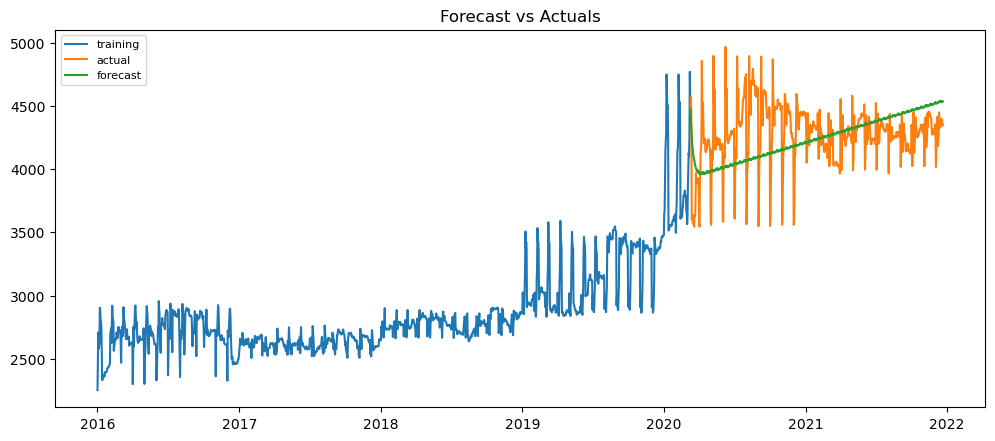

In [39]:
fc_series2 = pd.Series(fc, index=data_test.index)
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(data_train, label='training')
plt.plot(data_test, label='actual')
plt.plot(fc_series2, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [40]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
print(np.sqrt(metrics.mean_squared_error(data_test,fc_series2)))
print(mean_absolute_percentage_error(data_test,fc_series2)*100)

280.4998604818928
5.229272456564975


# GRID for SRIMA

In [25]:
import itertools
p = range(2, 8)
d = range(1,2)
q = range(4, 6)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data_train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (2, 1, 5) x (2, 1, 5, 12)
SARIMAX: (2, 1, 5) x (3, 1, 4, 12)
SARIMAX: (3, 1, 4) x (3, 1, 5, 12)
SARIMAX: (3, 1, 4) x (4, 1, 4, 12)


In [41]:
from pmdarima import auto_arima
import pmdarima as pm
model_s = pm.auto_arima(data_train, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=7, max_q=5, # maximum p and q
                      m=12,              # frequency of series
                      d=1,           # let model determine 'd'
                      seasonal=True,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=18034.916, Time=8.61 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=18031.120, Time=0.08 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=18033.753, Time=1.79 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=18033.700, Time=2.20 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=18029.568, Time=0.03 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=18033.098, Time=0.41 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=18033.091, Time=0.62 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=18018.945, Time=3.63 sec
 ARIMA(0,1,0)(2,0,1)[12] intercept   : AIC=17995.820, Time=10.34 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=18010.643, Time=3.68 sec
 ARIMA(0,1,0)(2,0,2)[12] intercept   : AIC=17966.215, Time=13.46 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=18001.132, Time=10.68 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=17964.979, Time=15.74 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=18002.975, Time=12.60 sec


In [27]:
import statsmodels.api as sm
#mod2 = sm.tsa.statespace.SARIMAX(data_train,order = (6,1,6),seasonal_order = (6,1,6,4))
mod2 = sm.tsa.statespace.SARIMAX(data_train,order = (6,1,6),seasonal_order = (6,1,6,12))
#mod2 = sm.tsa.statespace.SARIMAX(data_train,order = (6,1,6),seasonal_order = (6,1,6,52))
result_p = mod2.fit()
print(result_p.summary())

C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              price   No. Observations:                 1530
Model:             SARIMAX(6, 1, 6)x(6, 1, 6, 12)   Log Likelihood               -9011.264
Date:                            Wed, 27 Jul 2022   AIC                          18072.529
Time:                                    14:32:31   BIC                          18205.641
Sample:                                01-01-2016   HQIC                         18122.090
                                     - 03-09-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6207      0.468     -1.326      0.185      -1.538       0.297
ar.L2          0.0769      0.219   

In [29]:
import statsmodels.api as sm
#mod3 = sm.tsa.statespace.SARIMAX(data_train,order = (7,1,7),seasonal_order = (7,1,7,4))
mod3 = sm.tsa.statespace.SARIMAX(data_train,order = (7,1,7),seasonal_order = (7,1,7,12))
#mod3 = sm.tsa.statespace.SARIMAX(data_train,order = (7,1,7),seasonal_order = (7,1,7,52))
result_r = mod3.fit()
print(result_r.summary())

C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              price   No. Observations:                 1530
Model:             SARIMAX(7, 1, 7)x(7, 1, 7, 12)   Log Likelihood               -8984.270
Date:                            Wed, 27 Jul 2022   AIC                          18026.541
Time:                                    15:06:36   BIC                          18180.951
Sample:                                01-01-2016   HQIC                         18084.032
                                     - 03-09-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3765      0.568     -0.662      0.508      -1.490       0.737
ar.L2          0.0971      0.277   

In [13]:
import statsmodels.api as sm
mod4 = sm.tsa.statespace.SARIMAX(data_train,order = (2,1,0),seasonal_order = (0,1,0,12))
result_q = mod4.fit()
print(result_q.summary())

C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                      
Dep. Variable:                              price   No. Observations:                 1530
Model:             SARIMAX(2, 1, 0)x(0, 1, 0, 12)   Log Likelihood               -9445.625
Date:                            Fri, 29 Jul 2022   AIC                          18897.251
Time:                                    02:37:11   BIC                          18913.224
Sample:                                01-01-2016   HQIC                         18903.198
                                     - 03-09-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0324      0.021      1.574      0.115      -0.008       0.073
ar.L2         -0.0259      0.032   

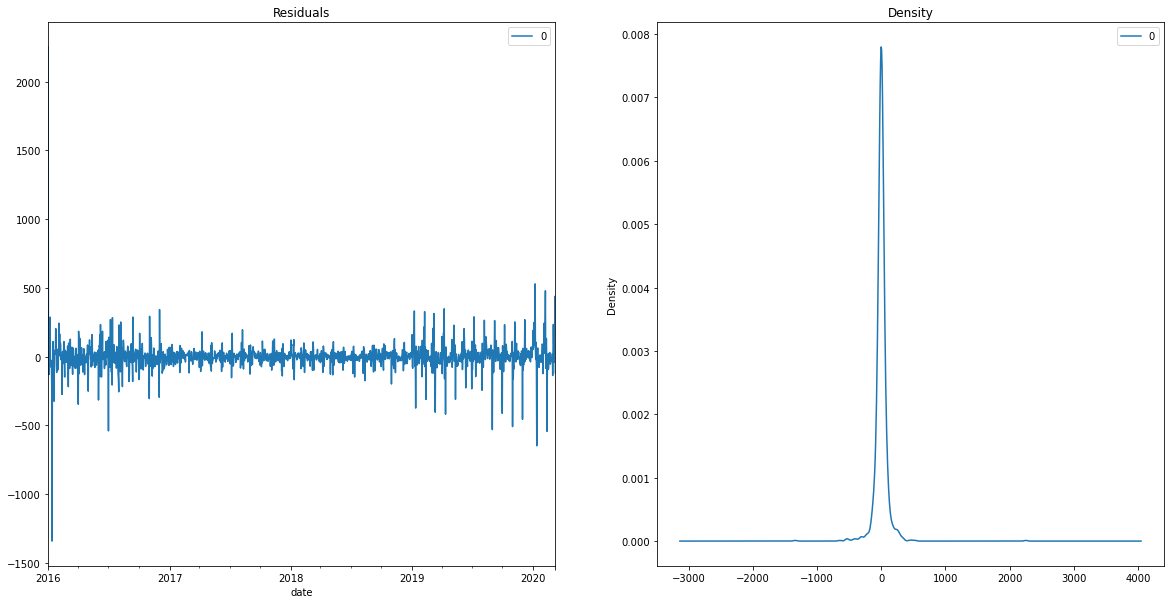

date
2016-01-01    2252.600000
2016-01-02     202.571477
2016-01-03     255.843664
2016-01-04    -129.458769
2016-01-05      22.322539
                 ...     
2020-03-05     176.419699
2020-03-06     -41.401510
2020-03-07     131.859638
2020-03-08     439.619860
2020-03-09    -116.891683
Length: 1530, dtype: float64


In [31]:
residuals3 = pd.DataFrame(result_r.resid)
fig, ax = plt.subplots(1,2)
residuals3.plot(title="Residuals", ax=ax[0])
residuals3.plot(kind='kde', title='Density', ax=ax[1],figsize=(20,10))
plt.show()
print(result_r.resid)

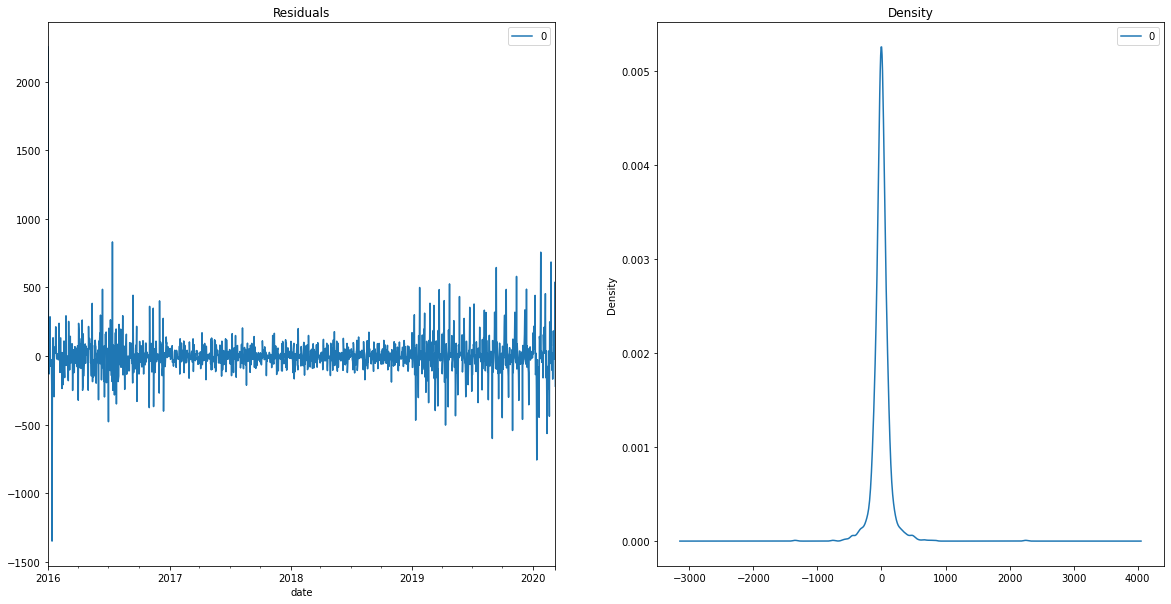

date
2016-01-01    2252.600000
2016-01-02     201.371565
2016-01-03     253.922176
2016-01-04    -130.317339
2016-01-05      20.098733
                 ...     
2020-03-05     153.788815
2020-03-06     -23.838452
2020-03-07     115.898633
2020-03-08     538.953225
2020-03-09    -219.205185
Length: 1530, dtype: float64


In [14]:
residuals4 = pd.DataFrame(result_q.resid)
fig, ax = plt.subplots(1,2)
residuals4.plot(title="Residuals", ax=ax[0])
residuals4.plot(kind='kde', title='Density', ax=ax[1],figsize=(20,10))
plt.show()
print(result_q.resid)

In [33]:
residuals3.describe()

,0
count,1530.000000
mean,1.752911
std,107.948263
min,-1341.154696
25%,-27.707532
50%,1.415498
75%,30.013120
max,2252.600000


In [15]:
residuals4.describe()

,0
count,1530.000000
mean,1.216703
std,139.806207
min,-1347.985212
25%,-47.093500
50%,-0.512033
75%,45.221057
max,2252.600000


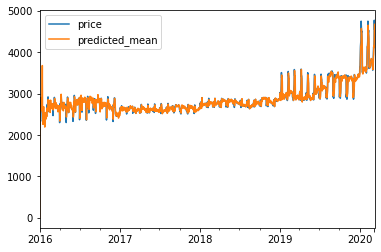

In [32]:
# Actual vs Fitted
forecast_2 = result_r.predict(dynamic=False)
pd.concat([data_train,forecast_2],axis=1).plot()
figsize = (20,10)
plt.show()

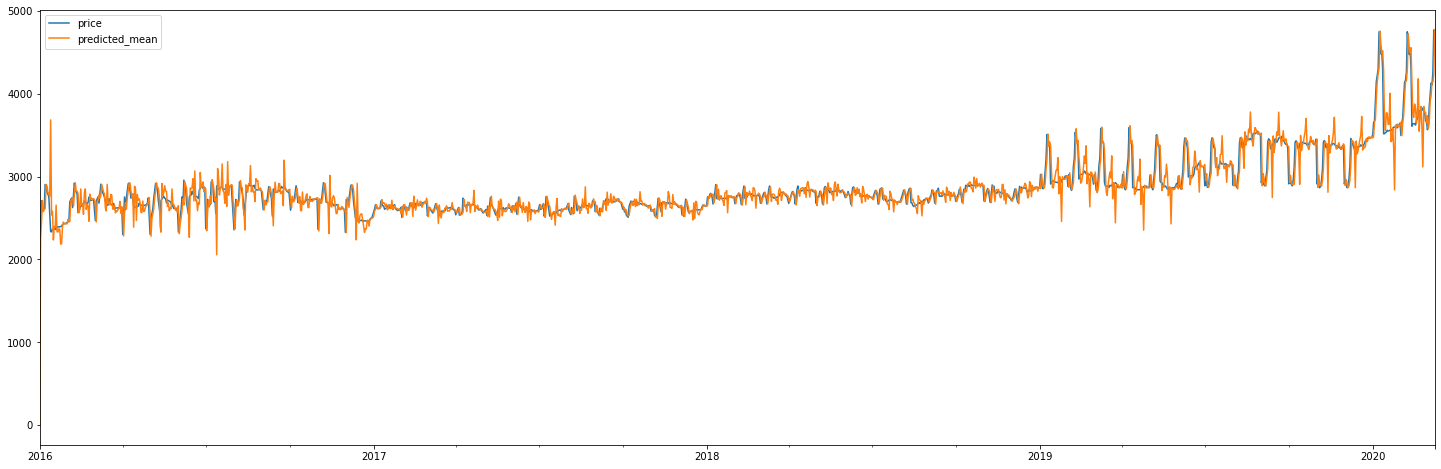

In [16]:
# Actual vs Fitted
forecast_3 = result_q.predict(dynamic=False)
pd.concat([data_train,forecast_3],axis=1).plot()
figsize = (20,10)
plt.show()

In [34]:
# Forecast
fc = result_r.forecast(652, alpha=0.05)  # 95% conf
fc

2020-03-10    4493.706019
2020-03-11    4444.454171
2020-03-12    4334.684771
2020-03-13    4213.142886
2020-03-14    4161.988308
                 ...     
2021-12-17    5604.240329
2021-12-18    5615.901335
2021-12-19    5624.067499
2021-12-20    5626.219049
2021-12-21    5620.574907
Freq: D, Name: predicted_mean, Length: 652, dtype: float64

In [17]:
fc_r = result_q.forecast(652, alpha=0.05)  # 95% conf
fc_r

2020-03-10     4515.730985
2020-03-11     4417.751393
2020-03-12     4420.935616
2020-03-13     4313.438257
2020-03-14     4358.817407
                  ...     
2021-12-17    44946.669463
2021-12-18    44908.800448
2021-12-19    44810.820856
2021-12-20    44814.005078
2021-12-21    44706.507720
Freq: D, Name: predicted_mean, Length: 652, dtype: float64

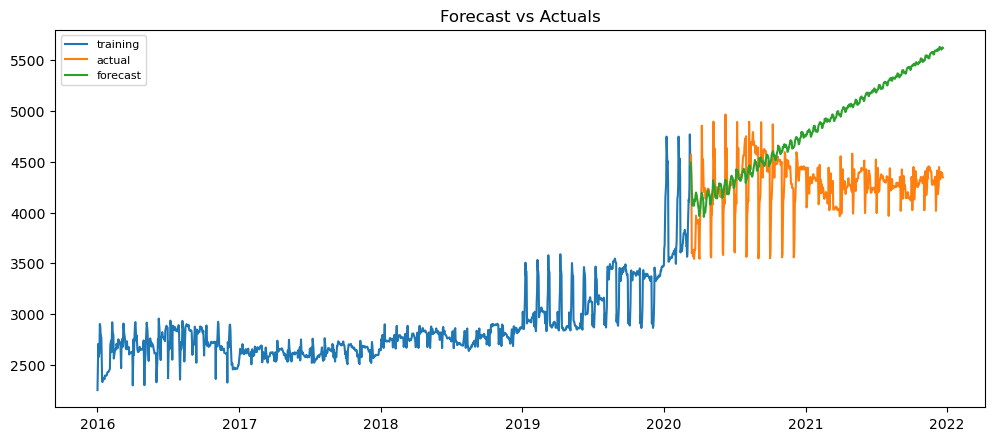

In [35]:
fc_series3 = pd.Series(fc, index=data_test.index)
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(data_train, label='training')
plt.plot(data_test, label='actual')
plt.plot(fc_series3, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

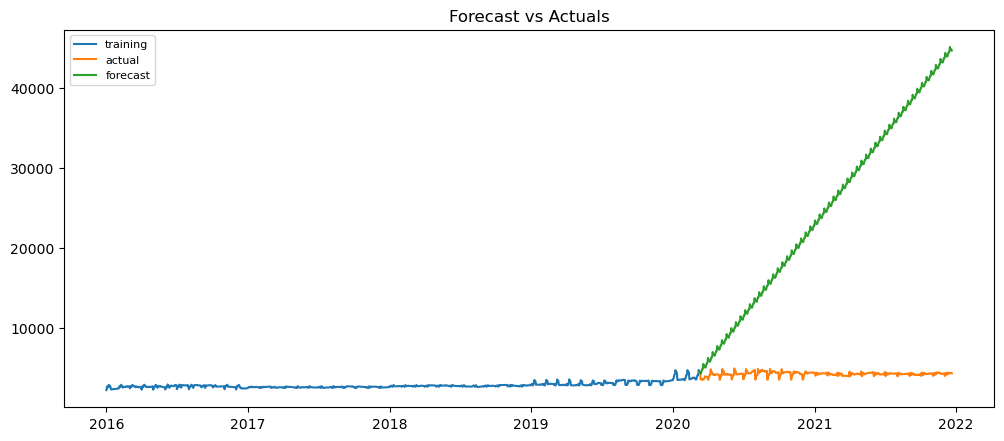

In [18]:
fc_series4 = pd.Series(fc_r, index=data_test.index)
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(data_train, label='training')
plt.plot(data_test, label='actual')
plt.plot(fc_series4, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [36]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
print(np.sqrt(metrics.mean_squared_error(data_test,fc_series3)))
print(mean_absolute_percentage_error(data_test,fc_series3)*100)

745.5129415125001
14.532892537281914


In [44]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
print(np.sqrt(metrics.mean_squared_error(data_test,fc_series4)))
print(mean_absolute_percentage_error(data_test,fc_series4)*100)

24027.345979028054
486.8257712218284


# FB Prophet

In [15]:
!pip install prophet

  Using cached prophet-1.1-cp39-cp39-win_amd64.whl (12.1 MB)
  Using cached holidays-0.14.2-py3-none-any.whl (179 kB)
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl (18 kB)
  Using cached cmdstanpy-1.0.4-py3-none-any.whl (73 kB)


In [3]:
from prophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [4]:
m = Prophet()

In [5]:
data1=data.reset_index()

In [6]:
data1

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75
...,...,...
2177,2021-12-17,4394.40
2178,2021-12-18,4389.50
2179,2021-12-19,4389.50
2180,2021-12-20,4354.10


In [7]:
data1.rename(columns = {'date' : 'ds', 'price' : 'y'}, inplace = True)

In [8]:
data1

,ds,y
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75
...,...,...
2177,2021-12-17,4394.40
2178,2021-12-18,4389.50
2179,2021-12-19,4389.50
2180,2021-12-20,4354.10


In [9]:
model4 = m.fit(data1)

14:05:50 - cmdstanpy - INFO - Chain [1] start processing
14:05:53 - cmdstanpy - INFO - Chain [1] done processing


In [14]:
future = m.make_future_dataframe(periods=30,freq ='D')
future.tail()

,ds
2207,2022-01-16
2208,2022-01-17
2209,2022-01-18
2210,2022-01-19
2211,2022-01-20


In [15]:
forecast_fb = m.predict(future)
forecast_fb[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2207,2022-01-16,4257.302992,4052.068200,4472.279335
2208,2022-01-17,4253.595316,4022.798253,4459.331742
2209,2022-01-18,4249.544763,4039.187937,4456.622471
2210,2022-01-19,4244.564591,4035.505255,4461.443149
2211,2022-01-20,4241.111348,4013.229857,4464.442434


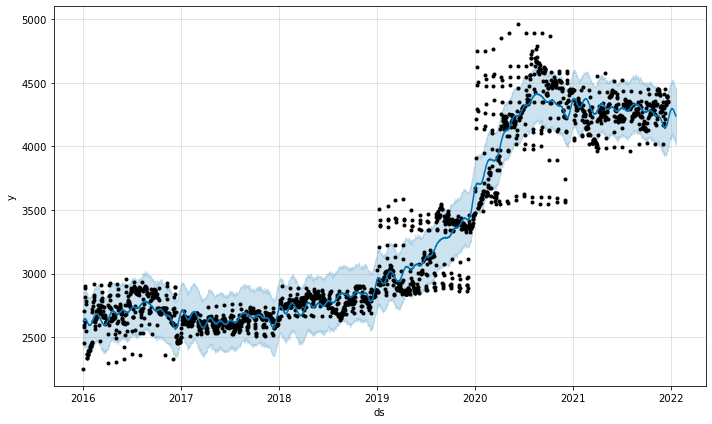

In [16]:
fig1 = m.plot(forecast_fb)

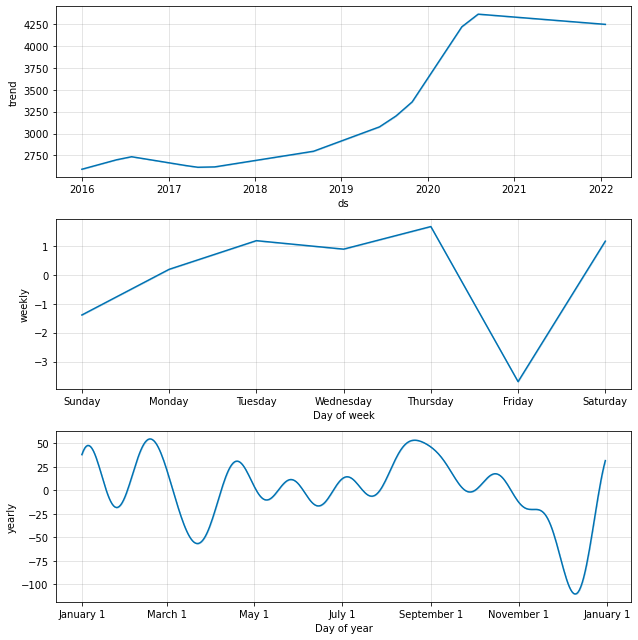

In [17]:
fig2 = m.plot_components(forecast_fb)

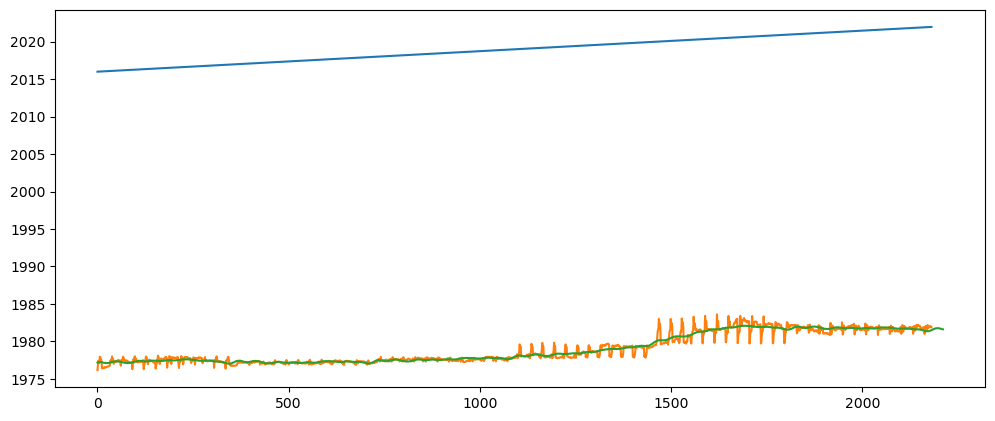

In [19]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(data1, label='training')
plt.plot(forecast_fb['yhat'], label='forecast')

In [21]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
print(np.sqrt(metrics.mean_squared_error(forecast_fb['yhat_lower'],forecast_fb['yhat_upper'])))
print(mean_absolute_percentage_error(forecast_fb['yhat_lower'],forecast_fb['yhat_upper'])*100)

432.20858267169586
14.703327836645638


# OUT of all this 3 model with different value we got to know that ARIMA model with 7 , 1, 4 value is best performing so we chose ARIMA model

# deployment 

In [14]:
import pickle

In [16]:
pickle.dump(model_1_fit,open("model_1_fit.pickle","wb"))

In [17]:
pip install streamlit